In [2]:
packageVersion("monocle3")
rm(list = ls())  # Clear the environment
options(warn=-1) # Turn off warning message globally
library("monocle3") # Load Monocle
library("Biobase")
library("Seurat")
library("ggplot2")
library("xlsx")
library("scales")

[1] ‘0.2.3.0’

Loading required package: Biobase

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; vie


# subsetting cells and genes

In [3]:
MPOA.integrated<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MPOA.integrated.rds")
P23M<-readRDS(file ="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/P23M.rds")
P35M<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/P35M.rds")
AM<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/AM.rds")
Cast<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/Cast.rds")
P23F<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/P23F.rds")
P35F<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/P35F.rds")
AF<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/AF.rds")
OVX<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/OVX.rds")

In [4]:
new.ident <- c("Mix1","Vgat1","Vglu1","Vgat2","Vgat3","Vgat4","Mix2","Vglu2","Vgat5","Vglu3","Vglu4","Vgat6","Vgat7","Vgat8","Vglu5","Vglu6","Vgat9","Vgat10","Vgat11","Vglu7","Vgat12","Vgat13","Vgat14","Vgat15","Vglu8","Vglu9","Vgat16","Vglu10","Vgat17","Vgat18","Vgat19","Vglu11","Vglu12","Ambiguous1","Mix3","Vgat20")
names(x = new.ident) <- levels(x =MPOA.integrated)
MPOA.integrated<- RenameIdents(object =MPOA.integrated, new.ident)

In [5]:
#identifying cluster barcodes in each condition
# exp. Oligo_1_barcode_ctrl gives all barcodes in it
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(MPOA.integrated@assays$RNA@data[,which(Idents(object=MPOA.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
assign(paste(new.ident[i],"_barcode_P23M",sep=""),intersect(colnames(P23M@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_P35M",sep=""),intersect(colnames(P35M@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_AM",sep=""),intersect(colnames(AM@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_Cast",sep=""),intersect(colnames(Cast@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_P23F",sep=""),intersect(colnames(P23F@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_P35F",sep=""),intersect(colnames(P35F@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_AF",sep=""),intersect(colnames(AF@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_OVX",sep=""),intersect(colnames(OVX@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
}

In [6]:
#hormone rich
#Hormone_rich<-c(Vgat2_barcode,Vgat4_barcode,Vgat16_barcode)
Hormone_rich<-c(Vgat2_barcode,Vgat4_barcode,Vgat16_barcode)

In [7]:
Vgat_barcode_AM<-intersect(rownames(AM@meta.data),Hormone_rich)
Vgat_barcode_P35M<-intersect(rownames(P35M@meta.data),Hormone_rich)
Vgat_barcode_P23M<-intersect(rownames(P23M@meta.data),Hormone_rich)
Vgat_barcode_Cast<-intersect(rownames(Cast@meta.data),Hormone_rich)
Vgat_barcode_AF<-intersect(rownames(AF@meta.data),Hormone_rich)
Vgat_barcode_P35F<-intersect(rownames(P35F@meta.data),Hormone_rich)
Vgat_barcode_P23F<-intersect(rownames(P23F@meta.data),Hormone_rich)
Vgat_barcode_OVX<-intersect(rownames(OVX@meta.data),Hormone_rich)

In [8]:
celltype<-vector()
conditiontype<-vector()
for (i in 1:dim(MPOA.integrated@meta.data)[1]){
    celltype[i]<-new.ident[as.numeric(MPOA.integrated@meta.data$integrated_snn_res.0.8[i])]
    conditiontype[i]<-paste(MPOA.integrated@meta.data$stim[i],celltype[i],sep="")
}
MPOA.integrated@meta.data$celltype<-celltype
MPOA.integrated@meta.data$conditiontype<-conditiontype

In [9]:
#order is important
merge_all<-subset(x =MPOA.integrated, cells=c(Vgat_barcode_P23M,Vgat_barcode_P35M,Vgat_barcode_AM,Vgat_barcode_Cast))


In [10]:
celltype<-vector()
conditiontype<-vector()
for (i in 1:dim(merge_all@meta.data)){
    k<-grep(rownames(merge_all@meta.data)[i],rownames(MPOA.integrated@meta.data))
    celltype[i]<-MPOA.integrated$celltype[k]
    conditiontype[i]<-MPOA.integrated$conditiontype[k]
}
merge_all@meta.data$celltype<-celltype
merge_all@meta.data$conditiontype<-conditiontype

In [11]:
# or
merge_all@meta.data$stim<-factor(merge_all@meta.data$stim,levels=c("P23M","P35M","AM","Cast"))
merge_all@meta.data$celltype<-factor(merge_all@meta.data$celltype,levels=c("Vgat2","Vgat4","Vgat16"))

using DEGs generated using log data

In [12]:
library(xlsx)
gene_list<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/AM_over_Cast/gene_adjust_Vgat_0.1.xlsx",sheetIndex=1)     
if(dim(gene_list)[1]>150){gene_list<-gene_list[order(gene_list[,"p_val_adjust"]),][1:150,]}else{
    gene_list<-gene_list
}

unique_gene1<-unique(c(as.character(gene_list[,1])))

gene_list<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/P35M_over_Cast/gene_adjust_Vgat_0.1.xlsx",sheetIndex=1)     
if(dim(gene_list)[1]>150){gene_list<-gene_list[order(gene_list[,"p_val_adjust"]),][1:150,]}else{
    gene_list<-gene_list
}


unique_gene2<-unique(c(as.character(gene_list[,1])))



unique_gene<-unique(c(unique_gene1,unique_gene2))

In [15]:
#for MELD
expression<-t(as.matrix(merge_all@assays$RNA@data[unique_gene,]))
for(i in 1:length(unique_gene)){
    merge_all@meta.data[,unique_gene[i]]<-expression[,unique_gene[i]]
}
metadata<- merge_all@meta.data
metadata$group<-metadata$stim
Condition<-numeric()
for(i in 1:dim(metadata)[1]){
   if(metadata$group[i]=="AM" | metadata$group[i]=="P35M"  ) {
       Condition[i]<-"mature"
   }else if ( metadata$group[i]=="P23M" | metadata$group[i]=="Cast" ) {
       Condition[i]<-"immature"
   }
}
metadata$Condition<-Condition
write.xlsx2(metadata,file=("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/male/Esr1_3/metadata_MELD.xlsx"))

In [34]:
#for SVM
library(xlsx)
gene_list<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/AM_over_Cast/gene_adjust_Vgat_0.1.xlsx",sheetIndex=1)     
if(dim(gene_list)[1]>30){gene_list<-gene_list[order(gene_list[,"p_val_adjust"]),][1:30,]}else{
    gene_list<-gene_list
}

unique_gene1<-unique(c(as.character(gene_list[,1])))

gene_list<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/P35M_over_Cast/gene_adjust_Vgat_0.1.xlsx",sheetIndex=1)     
if(dim(gene_list)[1]>30){gene_list<-gene_list[order(gene_list[,"p_val_adjust"]),][1:30,]}else{
    gene_list<-gene_list
}


unique_gene2<-unique(c(as.character(gene_list[,1])))



unique_gene<-unique(c(unique_gene1,unique_gene2))

In [35]:
unique_gene

[1] "Eef1a2"        "mt-Co2"        "mt-Atp6"       "Pgr"          
 [5] "Ptp4a1"        "mt-Nd1"        "Itm2c"         "Prkce"        
 [9] "Cntnap2"       "Maged1"        "Irs4"          "Lamp5"        
[13] "1500009L16Rik" "Gm10076"       "Actg1"         "Parm1"        
[17] "Ube2m"         "Greb1"         "Ogfrl1"        "Pak3"         
[21] "Calm3"         "Mt3"           "Tmsb10"        "Socs2"        
[25] "mt-Cytb"       "Apoc3"         "Sez6l"         "mt-Co1"       
[29] "mt-Nd4"        "Hpcal1"        "mt-Co3"        "mt-Nd2"       
[33] "Ctnna2"        "Napb"          "Ywhag"         "Id4"          
[37] "Dynll2"        "Eif4g2"        "Grik1"         "mt-Nd4l"

In [36]:
#for svm
expression<-t(as.matrix(merge_all@assays$RNA@data[unique_gene,]))
for(i in 1:length(unique_gene)){
    merge_all@meta.data[,unique_gene[i]]<-expression[,unique_gene[i]]
}
metadata<- merge_all@meta.data
metadata$group<-metadata$stim
Condition<-numeric()
for(i in 1:dim(metadata)[1]){
   if(metadata$group[i]=="AM" | metadata$group[i]=="P35M"  ) {
       Condition[i]<-"mature"
   }else if ( metadata$group[i]=="P23M" | metadata$group[i]=="Cast" ) {
       Condition[i]<-"immature"
   }
}
metadata$Condition<-Condition

In [39]:
write.xlsx2(metadata,file=("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/male/Esr1_3/svm/metadata.xlsx"))

In [51]:
#for svm HCR gene
unique_gene<-c("Npy2r","Pgr15l","Sytl4","Lamp5","Pgr","Nrip1","Acvr1c","Apoc3","Greb1")
expression<-t(as.matrix(merge_all@assays$RNA@data[unique_gene,]))
for(i in 1:length(unique_gene)){
    merge_all@meta.data[,unique_gene[i]]<-expression[,unique_gene[i]]
}
metadata<- merge_all@meta.data
metadata$group<-metadata$stim
Condition<-numeric()
for(i in 1:dim(metadata)[1]){
   if(metadata$group[i]=="AM" | metadata$group[i]=="P35M"  ) {
       Condition[i]<-"mature"
   }else if ( metadata$group[i]=="P23M" | metadata$group[i]=="Cast" ) {
       Condition[i]<-"immature"
   }
}
metadata$Condition<-Condition
write.xlsx2(metadata,file=("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/male/Esr1_3/svm/metadata_HCR.xlsx"))


In [52]:
gene_list<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/AM_over_Cast/gene_adjust_Vgat_0.1.xlsx",sheetIndex=1)
gene_list$ratio<-gene_list$pct.1/gene_list$pct.2
gene_list_ratio<-gene_list[order(-gene_list$ratio),]
tail(gene_list[,1],20)[!tail(gene_list[,1],20) %in% gene_list_ratio[1:50,1]]

[1] mt-Cytb Pdxp    Ppia    mt-Nd4  Rpl35   Impact  mt-Co1  mt-Co3 
138 Levels: 1500009L16Rik Aatk Abat Actg1 Acvr1c Adgrl1 Aes AF529169 ... Ywhah

In [53]:
gene_list<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/P23M_over_AM/gene_adjust_Vgat_0.1.xlsx",sheetIndex=1)
gene_list$ratio<-gene_list$pct.1/gene_list$pct.2
gene_list_ratio<-gene_list[order(-gene_list$ratio),]
tail(gene_list[,1],20)[!tail(gene_list[,1],20) %in% gene_list_ratio[1:50,1]]

[1] Son      Slc22a17 Cd81     Negr1    Ptma     Morf4l2  Oaz1     Nap1l5  
85 Levels: Apoe Arglu1 Astn2 Atp1a2 Atp1a3 Atxn7l3b Basp1 Cadm1 ... Zmym1

In [54]:
gene_list # Nap1l5 Oaz1

NA.,p_val,avg_logFC,pct.1,pct.2,p_val_adj,p_val_adjust,ratio
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Uba52,3.677804e-44,1.2036409,0.906,0.600,7.482492e-40,5.855432e-40,1.510000
Mt1,1.520376e-37,0.9593950,0.917,0.570,3.093206e-33,2.420135e-33,1.608772
Pgr15l,8.334654e-20,0.9256023,0.533,0.162,1.695685e-15,1.323293e-15,3.290123
Gm47283,7.722916e-22,0.8863413,0.817,0.630,1.571227e-17,1.227017e-17,1.296825
Plp1,1.846412e-28,0.8778502,0.744,0.340,3.756526e-24,2.937457e-24,2.188235
Gm10076,3.797597e-30,0.7319222,0.950,0.898,7.726212e-26,6.042357e-26,1.057906
Mbp,1.706572e-21,0.7263712,0.739,0.404,3.472021e-17,2.711060e-17,1.829208
Npy2r,1.015692e-10,0.7022101,0.639,0.434,2.066426e-06,1.605809e-06,1.472350
Tmsb10,5.377534e-50,0.6532894,1.000,1.000,1.094059e-45,8.562648e-46,1.000000


In [74]:
#for svm HCR control
unique_gene<-c("Pdxp","Ppia","mt-Nd4","Rpl35","Impact","mt-Co1","mt-Co3","Nap1l5","Oaz1")
expression<-t(as.matrix(merge_all@assays$RNA@data[unique_gene,]))
for(i in 1:length(unique_gene)){
    merge_all@meta.data[,unique_gene[i]]<-expression[,unique_gene[i]]
}
metadata<- merge_all@meta.data
metadata$group<-metadata$stim
Condition<-numeric()
for(i in 1:dim(metadata)[1]){
   if(metadata$group[i]=="AM" | metadata$group[i]=="P35M"  ) {
       Condition[i]<-"mature"
   }else if ( metadata$group[i]=="P23M" | metadata$group[i]=="Cast" ) {
       Condition[i]<-"immature"
   }
}
metadata$Condition<-Condition
write.xlsx2(metadata,file=("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/male/Esr1_3/svm/metadata_HCR_control.xlsx"))


In [23]:
saveRDS(unique_gene,file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/male/Esr1_3/svm/unique_gene.rds")

# make monocle object

In [13]:
GTF <- read.table(file='/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/male/features.tsv')
colnames(GTF)<-c("id","gene_short_name","gene_expression")
common<-intersect(GTF$gene_short_name,rownames(merge_all@assays$RNA@data))

In [14]:
GTF<-GTF[GTF$gene_short_name %in% common, ]
merge_all@assays$RNA@counts<-merge_all@assays$RNA@counts[common, ]
GTF<-GTF[!duplicated(GTF$gene_short_name),]

In [15]:
rownames(GTF)<-GTF$gene_short_name

In [16]:
#201029 Esr1_3 using dim 15
merge_all_m <-new_cell_data_set(as.matrix(merge_all@assays$RNA@counts), cell_metadata =merge_all@meta.data,gene_metadata = GTF)
merge_all_m  <- preprocess_cds(merge_all_m ,  num_dim =15,use_genes=unique_gene)
#merge_all_m  <- preprocess_cds(merge_all_m ,  num_dim =20)
merge_all_m <- reduce_dimension(merge_all_m,reduction_method = "UMAP",preprocess_method = 'PCA')

In [17]:
merge_all_m  <- cluster_cells(merge_all_m )

In [18]:
merge_all_m <- learn_graph(merge_all_m,use_partition = FALSE)


  |======================================================================| 100%


In [19]:
cell_type_color <- c("P23M"= "#697A21","P35M"="#88A0B4","AM" ="#000C3F","Cast"= "#FFDAB9","Esr1KOM"="darkblue")

In [21]:
saveRDS(merge_all_m,file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/male/Esr1_3/Vgat_Esr1_150_15_merge_all_m.rds")

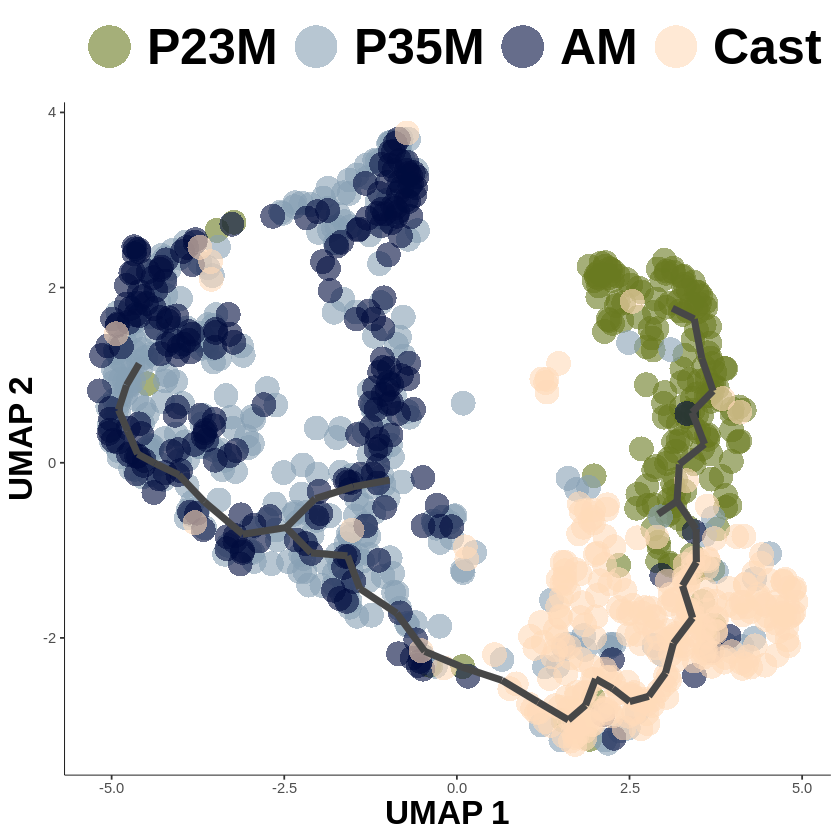

In [20]:
plot_cells(merge_all_m,
           color_cells_by = "stim",cell_size =7,alpha = 0.6,label_cell_groups = FALSE,trajectory_graph_segment_size = 2,label_roots = FALSE,
           label_leaves=FALSE,cell_stroke = I(0/2),
           label_branch_points=FALSE)+
                     scale_color_manual(values = cell_type_color)+ guides(colour = guide_legend(override.aes = list(size=12)))+theme(title=element_text(size=20,angle=0,face="bold"),strip.text = element_text(size = 40,face="bold")
    ,legend.title=element_blank(), legend.text=element_text(size = 30,face="bold") ,legend.position ="top")
#ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/male/Esr1_3/trajectory_stim_male_VgatEsr1_15dim_color_combinethick_2gene.pdf",width=9,height=10)

In [36]:
# or png
tiff("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/male/Esr1_3/trajectory_stim_male_VgatEsr1_15dim_color_combinethick_2gene.tiff", units="in", width=9, height=10, res=1000)
plot_cells(merge_all_m,
           color_cells_by = "stim",cell_size =7,alpha = 0.6,label_cell_groups = FALSE,trajectory_graph_segment_size = 2,label_roots = FALSE,
           label_leaves=FALSE,cell_stroke = I(0/2),
           label_branch_points=FALSE)+
                     scale_color_manual(values = cell_type_color)+ guides(colour = guide_legend(override.aes = list(size=12)))+theme(title=element_text(size=20,angle=0,face="bold"),strip.text = element_text(size = 40,face="bold")
    ,legend.title=element_blank(), legend.text=element_text(size = 30,face="bold") ,legend.position ="top")
dev.off()

png 
  2

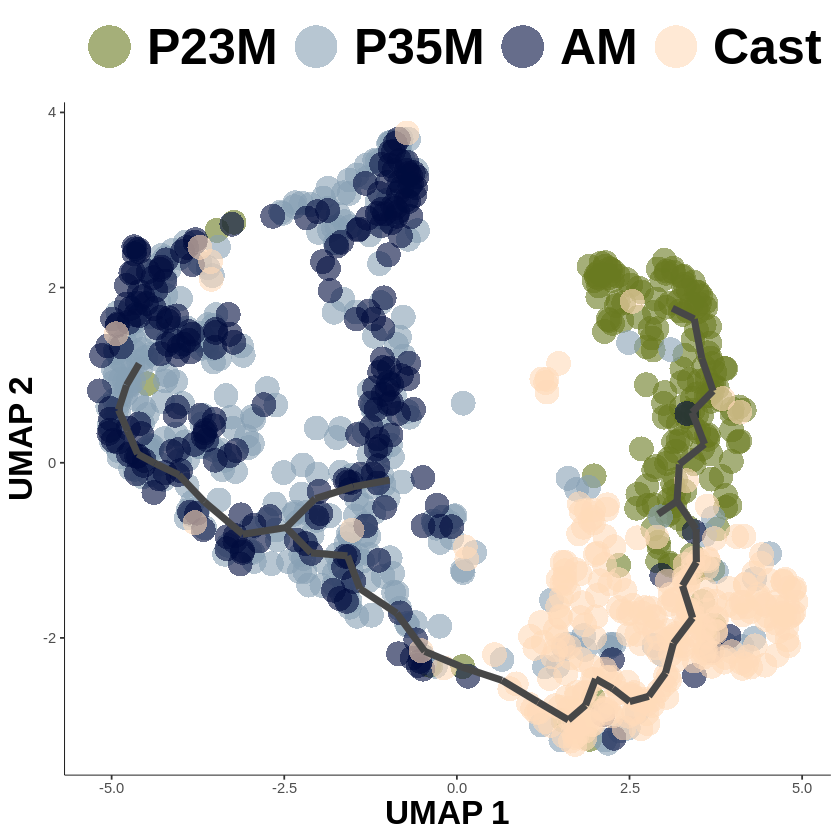

In [21]:
plot_cells(merge_all_m,
           color_cells_by = "stim",cell_size =7,alpha = 0.6,label_cell_groups = FALSE,trajectory_graph_segment_size = 2,label_roots = FALSE,
           label_leaves=FALSE,cell_stroke = I(0/2),
           label_branch_points=FALSE)+
                     scale_color_manual(values = cell_type_color)+ guides(colour = guide_legend(override.aes = list(size=12)))+theme(title=element_text(size=20,angle=0,face="bold"),strip.text = element_text(size = 40,face="bold")
    ,legend.title=element_blank(), legend.text=element_text(size = 30,face="bold") ,legend.position ="top")
#ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/male/Esr1_3/trajectory_stim_male_VgatEsr1_15dim_color_combinethick_2gene.pdf",width=10,height=7)

In [20]:
celltype_color <- c("Vgat2" = "cadetblue1",
                    "Vgat4" = "blue1",
                    "Vgat16" = 'dodgerblue4')

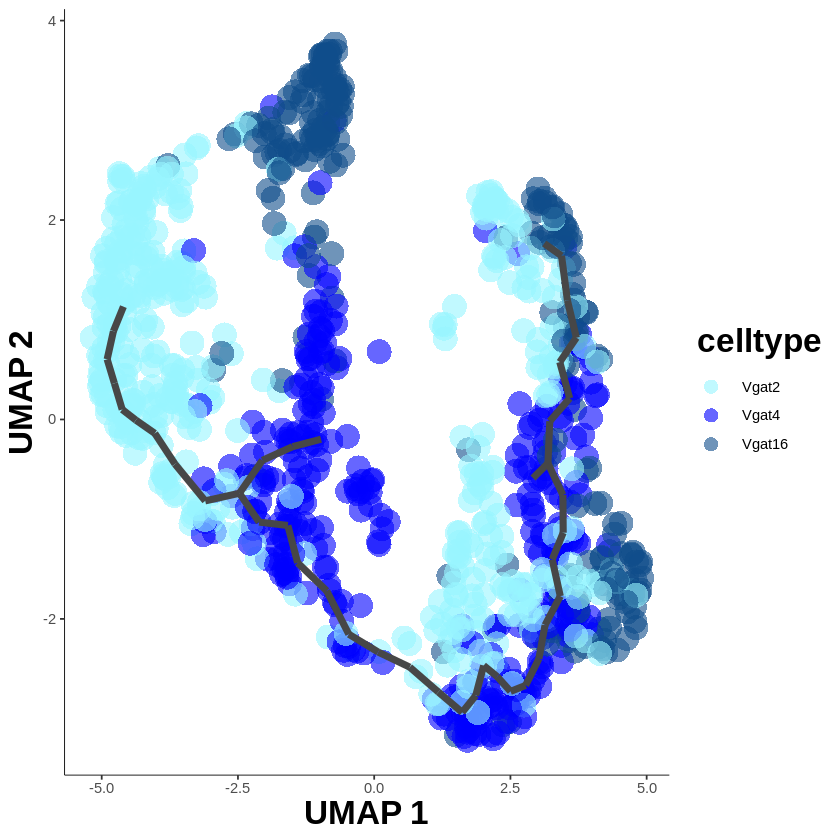

In [22]:
plot_cells(merge_all_m,
           color_cells_by = "celltype",cell_size =7,alpha = 0.6,label_cell_groups = FALSE,trajectory_graph_segment_size = 2,
           label_leaves=FALSE,cell_stroke = I(0/2),
           label_branch_points=FALSE)+
                     scale_color_manual(values = celltype_color)+theme(title=element_text(size=20,angle=0,face="bold"),strip.text = element_text(size = 40,face="bold"))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/male/Esr1_3/trajectory_cell_type_male_VgatEsr1_15dim_clolor3_default_gene.pdf",width=10,height=7)

In [21]:
get_earliest_principal_node <- function(merge_all_m, stim="P23M"){
  cell_ids <- which(colData(merge_all_m)[, "stim"] == stim)
  
  closest_vertex <-
  merge_all_m@principal_graph_aux[["UMAP"]]$pr_graph_cell_proj_closest_vertex
  closest_vertex <- as.matrix(closest_vertex[colnames(merge_all_m), ])
  root_pr_nodes <-
  igraph::V(principal_graph(merge_all_m)[["UMAP"]])$name[as.numeric(names
  (which.max(table(closest_vertex[cell_ids,]))))]
  
  root_pr_nodes
}
merge_all_m<- order_cells(merge_all_m, root_pr_nodes=get_earliest_principal_node(merge_all_m))

In [22]:
get_earliest_principal_node(merge_all_m)

[1] "Y_10"

In [23]:
pseudotime<-numeric()
for (i in 1:length(merge_all_m@ principal_graph_aux$UMAP$pseudotime)){
    pseudotime[i]<-merge_all_m@ principal_graph_aux$UMAP$pseudotime[[i]]
}

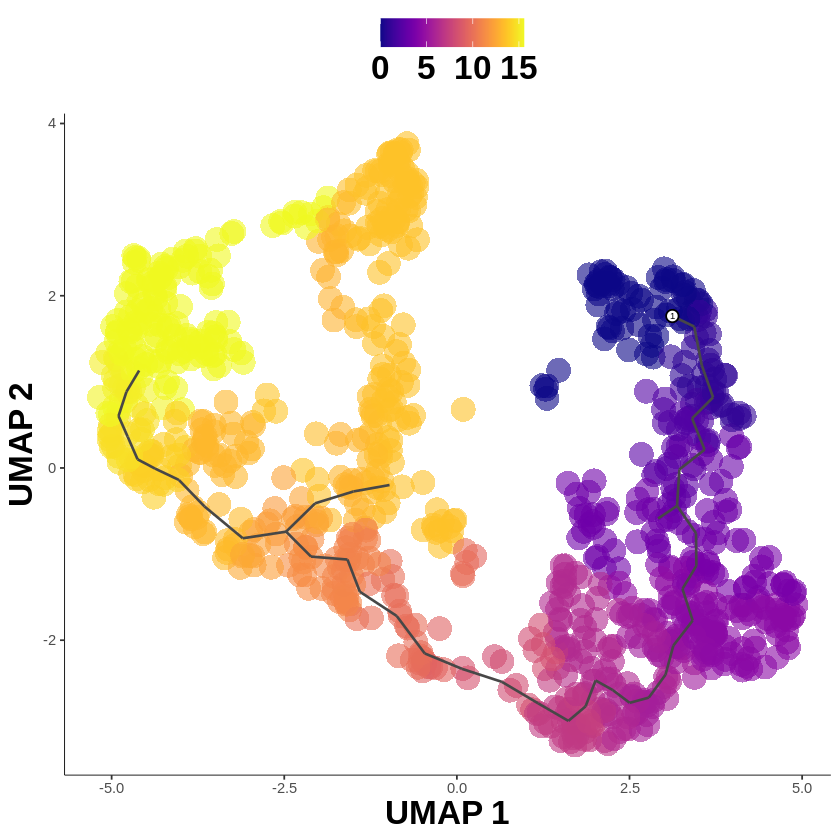

In [30]:
plot_cells(merge_all_m,
           color_cells_by = "pseudotime",cell_size =7,alpha = 0.6,label_cell_groups = FALSE,trajectory_graph_segment_size = 0.75,
           label_leaves=FALSE,cell_stroke = I(0/2),
           label_branch_points=FALSE)+
theme(title=element_text(size=20,angle=0,face="bold"),strip.text = element_text(size = 40,face="bold")
    ,legend.title=element_blank(), legend.text=element_text(size = 20,face="bold") ,legend.position ="top")
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/male/Esr1_3/trajectory_psedutime_male_VgatEsr1_15dim_color.pdf",width=9,height=10)

In [35]:
# or png
tiff("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/male/Esr1_3/trajectory_male_pseudotime_VgatEsr1_15dim.tiff", units="in", width=9, height=10, res=1000)
plot_cells(merge_all_m,
           color_cells_by = "pseudotime",cell_size =7,alpha = 0.6,label_cell_groups = FALSE,trajectory_graph_segment_size = 0.75,
           label_leaves=FALSE,cell_stroke = I(0/2),
           label_branch_points=FALSE)+
theme(title=element_text(size=20,angle=0,face="bold"),strip.text = element_text(size = 40,face="bold")
    ,legend.title=element_blank(), legend.text=element_text(size = 20,face="bold") ,legend.position ="top")
dev.off()

png 
  2

In [37]:
saveRDS(merge_all_m,file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/male/Esr1_3/Vgat_Esr1_150_15_merge_all_m.rds")

# branch specific DEG analysis

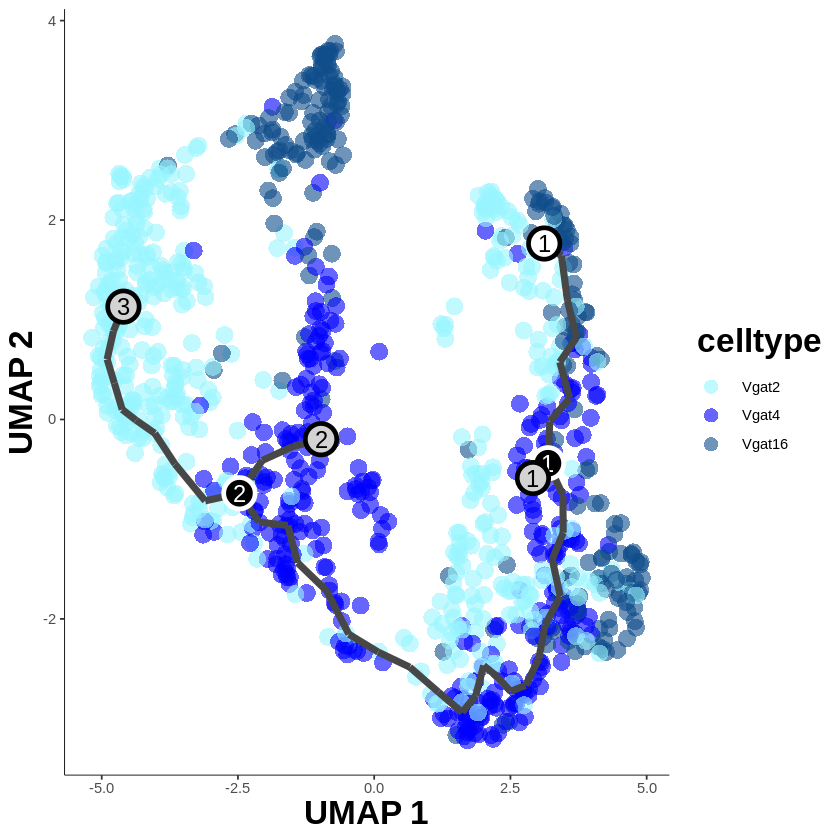

In [219]:
plot_cells(merge_all_m,
           color_cells_by = "celltype",cell_size =5,alpha = 0.6,label_cell_groups = FALSE,trajectory_graph_segment_size = 2,
           label_leaves=TRUE,cell_stroke = I(0/2),
           label_branch_points=TRUE,graph_label_size = 5)+
                     scale_color_manual(values = celltype_color)+theme(title=element_text(size=20,angle=0,face="bold"),strip.text = element_text(size = 40,face="bold"))

In [21]:
# collect cells only in 0>UMAP1>-2.5, UMAP2>-2
branch1_rnames<-numeric()
UMAP<-merge_all_m@int_colData@listData$reducedDims@listData$UMAP
for(i in 1:dim(UMAP)[1]){
if(UMAP[i,1]<0 & UMAP[i,1]>-2.5 & UMAP[i,2]>-2){
    branch1_rnames<-c(branch1_rnames,rownames(UMAP)[i])
}else{branch1_rnames<-branch1_rnames}
}

In [22]:
# collect cells only in -2.5>UMAP1, UMAP2>-2
branch2_rnames<-numeric()
UMAP<-merge_all_m@int_colData@listData$reducedDims@listData$UMAP
for(i in 1:dim(UMAP)[1]){
if(-2.5>UMAP[i,1] & UMAP[i,2]>-2){
    branch2_rnames<-c(branch2_rnames,rownames(UMAP)[i])
}else{branch2_rnames<-branch2_rnames}
}

In [23]:
Trunk_names<-rownames(UMAP)[rownames(UMAP) %in% c(branch1_rnames,branch2_rnames) ==FALSE]

In [24]:
branch<-numeric()
for(i in 1:dim(colData(merge_all_m))[1]){
if(rownames(colData(merge_all_m))[i] %in% branch1_rnames){
    branch<-c(branch,"branch1")
}else if(rownames(colData(merge_all_m))[i] %in% branch2_rnames){
    branch<-c(branch,"branch2")
}else if(rownames(colData(merge_all_m))[i] %in% Trunk_names){
    branch<-c(branch,"trunk")
}
}

In [25]:
colData(merge_all_m)$branch<-factor(branch)

In [26]:
branch_color <- c("branch1" = "cadetblue1",
                    "branch2" = "blue1",
                  "branch3" = "darkblue",
                    "trunk" = 'dodgerblue4')

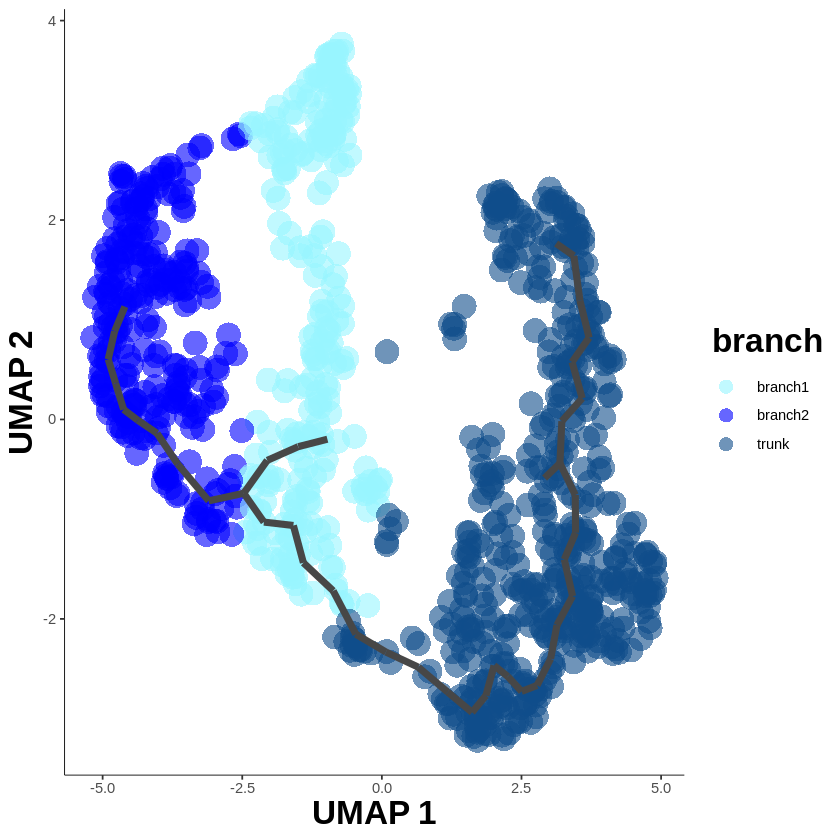

In [27]:
plot_cells(merge_all_m,
           color_cells_by = "branch",cell_size =7,alpha = 0.6,label_cell_groups = FALSE,trajectory_graph_segment_size = 2,
           label_leaves=FALSE,cell_stroke = I(0/2), label_roots = FALSE,
           label_branch_points=FALSE,graph_label_size = 5)+
                 scale_color_manual(values = branch_color)+  theme(title=element_text(size=20,angle=0,face="bold"),strip.text = element_text(size = 40,face="bold"))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/male/Esr1_3/trajectory_cell_type_male_VgatEsr1_15dim_branches.pdf",width=10,height=7)

#differentially expressed gene analysis at each branch using Seurat, you only need to run it once

In [29]:
merge_all_seurat<-merge_all

In [30]:
#just in case
branch<-numeric()
for(i in 1:dim(merge_all_seurat@meta.data)[1]){
if(rownames(merge_all_seurat@meta.data)[i] %in% branch1_rnames){
    branch<-c(branch,"branch1")
}else if(rownames(merge_all_seurat@meta.data)[i] %in% branch2_rnames){
    branch<-c(branch,"branch2")
}else if(rownames(merge_all_seurat@meta.data)[i] %in% Trunk_names){
    branch<-c(branch,"trunk")
}
}

In [31]:
merge_all_seurat@meta.data$branch<-branch

In [32]:
#merge_all_seurat[["branch"]] <- Idents(object = merge_all_seurat)
Idents(merge_all_seurat = merge_all_seurat) <- merge_all_seurat@meta.data$branch

In [33]:
one.markers <- FindMarkers(merge_all_seurat, ident.1 = "branch1", ident.2 ="trunk",print.bar = FALSE,logfc.threshold = 0,min.pct = 0,min.cells.gene = 3, min.cells.group = 1)

one.markers$p_val_adjust<-one.markers$p_val*(dim(one.markers)[1]:1)
sort_marker<-one.markers[order(-one.markers["avg_logFC"]),]

write.xlsx2(subset(sort_marker,avg_logFC>0 & p_val_adjust<0.05 & pct.1>0.1),file=("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/male/Esr1_3/DEG/branch1_over_trunk/All_gene.xlsx"))


In [284]:
one.markers <- FindMarkers(merge_all_seurat, ident.1 = "branch1", ident.2 ="trunk",print.bar = FALSE,logfc.threshold = 0,min.pct = 0,min.cells.gene = 3, min.cells.group = 1)

one.markers$p_val_adjust<-one.markers$p_val*(dim(one.markers)[1]:1)
sort_marker<-one.markers[order(-one.markers["avg_logFC"]),]

write.xlsx2(sort_marker,file=("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/male/Esr1_3/DEG/branch1_over_trunk/all_gene.xlsx"))


In [34]:
one.markers <- FindMarkers(merge_all_seurat, ident.1 = "branch2", ident.2 ="trunk",print.bar = FALSE,logfc.threshold = 0,min.pct = 0,min.cells.gene = 3, min.cells.group = 1)

one.markers$p_val_adjust<-one.markers$p_val*(dim(one.markers)[1]:1)
sort_marker<-one.markers[order(-one.markers["avg_logFC"]),]

write.xlsx2(subset(sort_marker,avg_logFC>0 & p_val_adjust<0.05 & pct.1>0.1),file=("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/male/Esr1_3/DEG/branch2_over_trunk/All_gene.xlsx"))


In [286]:
one.markers <- FindMarkers(merge_all_seurat, ident.1 = "branch2", ident.2 ="trunk",print.bar = FALSE,logfc.threshold = 0,min.pct = 0,min.cells.gene = 3, min.cells.group = 1)

one.markers$p_val_adjust<-one.markers$p_val*(dim(one.markers)[1]:1)
sort_marker<-one.markers[order(-one.markers["avg_logFC"]),]

write.xlsx2(sort_marker,file=("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/male/Esr1_3/DEG/branch2_over_trunk/all_gene.xlsx"))


# heat map along pseudotime in each branch

In [40]:
# simple DEGs
branch1<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/male/Esr1_3/DEG/branch1_over_trunk/All_gene.xlsx",sheetIndex=1)[,1]
branch2<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/male/Esr1_3/DEG/branch2_over_trunk/All_gene.xlsx",sheetIndex=1)[,1]
both<-intersect(branch1,branch2)

In [31]:
# specific DEGs
branch1<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/male/Esr1_3/DEG/branch1_over_trunk/all_gene.xlsx",sheetIndex=1)
branch2<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/male/Esr1_3/DEG/branch2_over_trunk/all_gene.xlsx",sheetIndex=1)

In [32]:
#specific version
branch1_gene<-intersect(subset(branch1,p_val_adjust<0.05 & avg_logFC>0.1 & pct.1>0.1)[,1],subset(branch2,avg_logFC< 0)[,1])
branch2_gene<-intersect(subset(branch2,p_val_adjust<0.05 & avg_logFC>0.1 & pct.1>0.1)[,1],subset(branch1,avg_logFC< 0)[,1])
both<-intersect(subset(branch1,p_val_adjust<0.05 & avg_logFC>0.1 & pct.1>0.1)[,1],subset(branch2,p_val_adjust<0.05 & avg_logFC>0.1 & pct.1>0.1)[,1])

In [33]:
gene_list<-c(as.character(branch1_gene[branch1_gene %in% both==FALSE]),as.character(branch2_gene[branch2_gene %in% both==FALSE]),both)

In [34]:
length(branch1_gene)
length(branch2_gene)
length(both)

[1] 93

[1] 217

[1] 45

In [35]:
#for branch1

In [36]:
B1<-merge_all_m
b1<-c(branch1_rnames,Trunk_names)

In [37]:
spacing<-10
Pseudotime<-seq(0, ceiling(max(B1@principal_graph_aux@listData$UMAP$pseudotime[b1])), by=ceiling(max(B1@principal_graph_aux@listData$UMAP$pseudotime[b1]))/spacing)
Pseudotime<-Pseudotime[1:spacing]

In [38]:
int<-Pseudotime[2]-Pseudotime[1]

In [39]:
#201113
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)
max_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)

for (i in 1:length(gene_list)){
L<-length(Pseudotime)

Cell_number_t<- data.frame("cluster" =Pseudotime, "gene"=(rep(gene_list[i],L))) # do not use c if the gene is factorizsed
#used normalized uncorrected data
for (p in 1:length(Pseudotime)){
barcode<-names(B1@principal_graph_aux@listData$UMAP$pseudotime[b1])[Pseudotime[p]< B1@principal_graph_aux@listData$UMAP$pseudotime[b1] &  B1@principal_graph_aux@listData$UMAP$pseudotime[b1]<Pseudotime[p]+int]
Cell_number_t$avg[p]<-(mean(merge_all@assays$RNA@data[gene_list[i],barcode])-mean(merge_all@assays$RNA@data[gene_list[i],b1]))/sd(merge_all@assays$RNA@data[gene_list[i],b1])
}
Cell_number<-rbind(Cell_number_t,Cell_number)
max_number_t<-subset(Cell_number_t,Cell_number_t$avg==max(Cell_number_t$avg))
max_number<-rbind(max_number_t,max_number)    
}

In [40]:
max_number_sort<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)
for (i in 1:length(Pseudotime)){
    temp<-subset(max_number,cluster==Pseudotime[i])
    temp<-temp[order(temp$avg),]
    max_number_sort<-rbind(max_number_sort,temp)}

In [41]:
Cell_number$cluster<-factor(Cell_number$cluster,levels=Pseudotime)
#Cell_number$gene<-factor(Cell_number$gene,levels=gene_list)
#Cell_number$gene<-factor(Cell_number$gene,levels=rev(unique(max_number_sort$gene)))

In [42]:
#temp_gene<-rev(unique(max_number_sort$gene))
temp_gene<-gene_list

In [41]:
color<-numeric()
size<-numeric()
for(i in 1:length(temp_gene)){
    if(temp_gene[i]=="Apoe" | temp_gene[i]=="Npy2r" |  temp_gene[i]=="Npy2r" | temp_gene[i]=="Gal"| temp_gene[i]=="Guk1" | temp_gene[i]=="Pgr"  | temp_gene[i]=="Prkce"  | temp_gene[i]=="Greb1" | temp_gene[i]=="Sytl4"| temp_gene[i]=="Cntnap2" |temp_gene[i]=="Sv2c" ){
        color[i]<-"black"
        size[i]<-20
    }else{
        color[i]<-"white"
        size[i]<-0
    }
}

In [45]:
# or 
color<-numeric()
size<-numeric()
for(i in 1:length(temp_gene)){
    if(temp_gene[i]==as.character(branch2_gene[branch2_gene %in% both==FALSE])[1] | temp_gene[i]==both[1] ){
        color[i]<-"black"
        size[i]<-20
    }else{
        color[i]<-"white"
        size[i]<-0
    }
}

In [42]:
max(B1@principal_graph_aux@listData$UMAP$pseudotime[Trunk_names])
min(B1@principal_graph_aux@listData$UMAP$pseudotime[branch1_rnames])
Pseudotime[7]

[1] 13.52434

In [43]:
min(B1@principal_graph_aux@listData$UMAP$pseudotime[branch1_rnames])

[1] 9.289429

In [44]:
Pseudotime[7]

[1] 9.6

In [46]:
color_x<-numeric()
size_x<-numeric()
for(i in 1:length(Pseudotime)){
    if(Pseudotime[i]==Pseudotime[7]){
        color_x[i]<-"black"
        size_x[i]<-25
    }else{
        color_x[i]<-"white"
        size_x[i]<-0
    }
}

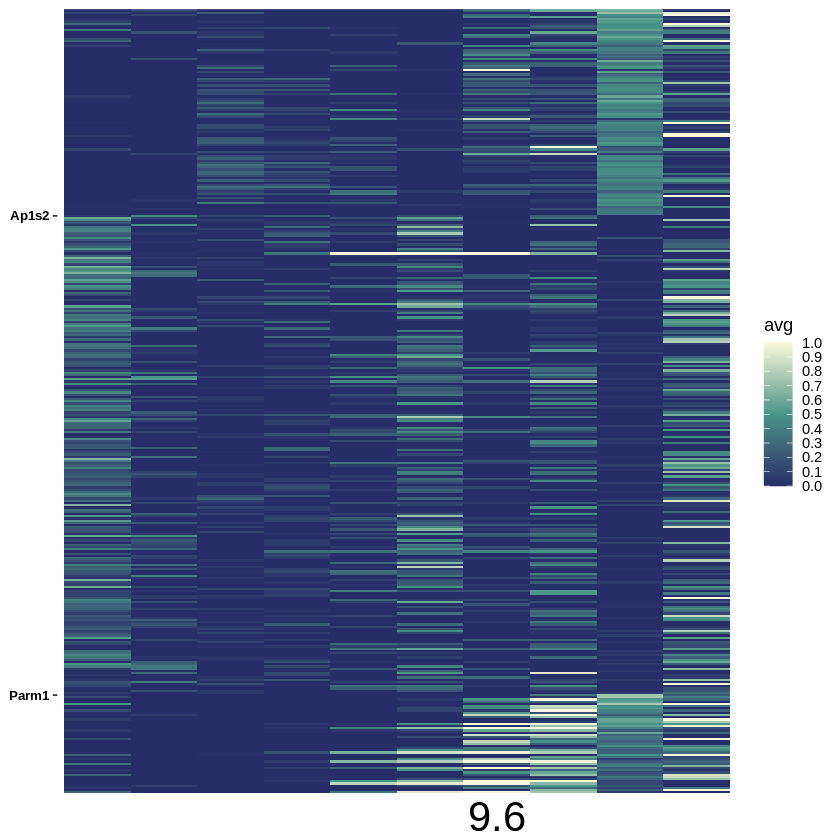

In [48]:
genes<-c(as.character(branch2_gene[branch2_gene %in% both==FALSE])[1],both[1])
high_C<-"#FCFADE"
middle_C<-"#489588"
low_C<-"#262E68"
low<- 0
high<- 1
p<-ggplot(data = Cell_number, mapping = aes(x = cluster, y = gene,fill =avg,label=gene)) + scale_y_discrete(breaks=c(genes))+
  geom_tile() + scale_fill_gradient2(limits=c(low, high), breaks=seq(low,high,by=0.1),low = low_C,mid=middle_C,high =high_C,  midpoint = 0.5,oob=squish) # + scale_fill_continuous(limits=c(low, high), breaks=seq(low,high,by=0.2),low = "black",high = "yellow", oob=squish)
pp<-p+ylab("gene")+xlab("psedutime")+theme(axis.text.y=element_text(size=8, colour = "black",face="bold"),axis.text.x=element_text(size=size_x,angle = 0, hjust =0.5,vjust=0.3,colour = color_x),axis.title=element_blank(),plot.title = element_blank(),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line.x = element_line(colour = "white", size = 0),axis.ticks.x = element_blank())+ggtitle("heatmap marker gene")
print(pp)
ggsave(file=paste(text="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/male/Esr1_3/male_branch1DEG_",low,"_",high,"color_adjusted.pdf"),width=7,height=10)

In [269]:
#for branch2

In [49]:
B2<-merge_all_m
b2<-c(branch2_rnames,Trunk_names)

In [50]:
spacing<-10
Pseudotime<-seq(0, ceiling(max(B2@principal_graph_aux@listData$UMAP$pseudotime[b2])), by=ceiling(max(B2@principal_graph_aux@listData$UMAP$pseudotime[b2]))/spacing)
Pseudotime<-Pseudotime[1:spacing]

In [51]:
int<-Pseudotime[2]-Pseudotime[1]

In [52]:
#201113
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)
max_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)

for (i in 1:length(gene_list)){
L<-length(Pseudotime)

Cell_number_t<- data.frame("cluster" =Pseudotime, "gene"=(rep(gene_list[i],L))) # do not use c if the gene is factorizsed
#used normalized uncorrected data
for (p in 1:length(Pseudotime)){
barcode<-names(B2@principal_graph_aux@listData$UMAP$pseudotime[b2])[Pseudotime[p]< B2@principal_graph_aux@listData$UMAP$pseudotime[b2] &  B2@principal_graph_aux@listData$UMAP$pseudotime[b2]<Pseudotime[p]+int]
Cell_number_t$avg[p]<-(mean(merge_all@assays$RNA@data[gene_list[i],barcode])-mean(merge_all@assays$RNA@data[gene_list[i],b2]))/sd(merge_all@assays$RNA@data[gene_list[i],b2])
}
Cell_number<-rbind(Cell_number_t,Cell_number)
max_number_t<-subset(Cell_number_t,Cell_number_t$avg==max(Cell_number_t$avg))
max_number<-rbind(max_number_t,max_number)    
}

In [53]:
max_number_sort<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)
for (i in 1:length(Pseudotime)){
    temp<-subset(max_number,cluster==Pseudotime[i])
    temp<-temp[order(temp$avg),]
    max_number_sort<-rbind(max_number_sort,temp)}

In [54]:
Cell_number$cluster<-factor(Cell_number$cluster,levels=Pseudotime)
#Cell_number$gene<-factor(Cell_number$gene,levels=gene_list)
#Cell_number$gene<-factor(Cell_number$gene,levels=rev(unique(max_number_sort$gene)))

In [55]:
#temp_gene<-rev(unique(max_number_sort$gene))
temp_gene<-gene_list

In [56]:
color<-numeric()
size<-numeric()
for(i in 1:length(temp_gene)){
    if(temp_gene[i]=="Apoe" | temp_gene[i]=="Npy2r" |  temp_gene[i]=="Npy2r" | temp_gene[i]=="Gal"| temp_gene[i]=="Guk1" | temp_gene[i]=="Pgr"  | temp_gene[i]=="Prkce"  | temp_gene[i]=="Greb1" | temp_gene[i]=="Sytl4"| temp_gene[i]=="Cntnap2" |temp_gene[i]=="Sv2c" ){
        color[i]<-"black"
        size[i]<-20
    }else{
        color[i]<-"white"
        size[i]<-0
    }
}

In [57]:
min(B2@principal_graph_aux@listData$UMAP$pseudotime[branch2_rnames])

[1] 11.96532

In [61]:
Pseudotime[9]

[1] 12.8

In [62]:
color_x<-numeric()
size_x<-numeric()
for(i in 1:length(Pseudotime)){
    if(Pseudotime[i]==Pseudotime[9]){
        color_x[i]<-"black"
        size_x[i]<-25
    }else{
        color_x[i]<-"white"
        size_x[i]<-0
    }
}

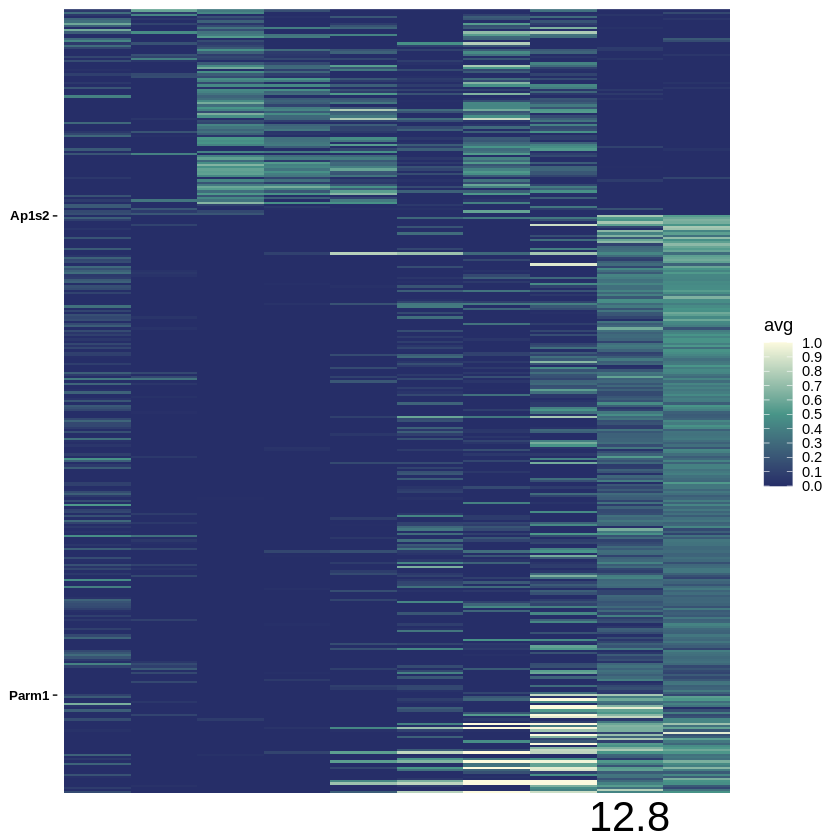

In [63]:
genes<-c(as.character(branch2_gene[branch2_gene %in% both==FALSE])[1],both[1])
high_C<-"#FCFADE"
middle_C<-"#489588"
low_C<-"#262E68"
low<- 0
high<- 1
p<-ggplot(data = Cell_number, mapping = aes(x = cluster, y = gene,fill =avg,label=gene)) + scale_y_discrete(breaks=c(genes))+
  geom_tile() + scale_fill_gradient2(limits=c(low, high), breaks=seq(low,high,by=0.1),low = low_C,mid=middle_C,high =high_C,  midpoint = 0.5,oob=squish) # + scale_fill_continuous(limits=c(low, high), breaks=seq(low,high,by=0.2),low = "black",high = "yellow", oob=squish)
pp<-p+ylab("gene")+xlab("psedutime")+theme(axis.text.y=element_text(size=8, colour = "black",face="bold"),axis.text.x=element_text(size=size_x,angle = 0, hjust =0.5,vjust=0.3,colour = color_x),axis.title=element_blank(),plot.title = element_blank(),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line.x = element_line(colour = "white", size = 0),axis.ticks.x = element_blank())+ggtitle("heatmap marker gene")
print(pp)
ggsave(file=paste(text="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/male/Esr1_3/male_branch2DEG_",low,"_",high,"color_adjusted.pdf"),width=7,height=10)

# comparing pseudtometime

In [24]:
pseudotime<-numeric()
for (i in 1:length(merge_all_m@ principal_graph_aux$UMAP$pseudotime)){
    pseudotime[i]<-merge_all_m@ principal_graph_aux$UMAP$pseudotime[[i]]
}
merge_all@meta.data$pseudotime<-pseudotime

In [25]:
age<-numeric()
color<-numeric()
for(i in 1:dim(merge_all@meta.data)[1]){
    if(merge_all@meta.data$stim[i]=="P23M"){age[i]<-23
                                           color[i]<-"#697A21"}
    else if (merge_all@meta.data$stim[i]=="P35M"){age[i]<-35
                                           color[i]<-"#88A0B4"}
    else if (merge_all@meta.data$stim[i]=="AM"){age[i]<-50
                                           color[i]<-"#000C3F"}
     else if (merge_all@meta.data$stim[i]=="Cast"){age[i]<-50
                                           color[i]<- "#FFDAB9"}
}
   merge_all@meta.data$age<-age
    merge_all@meta.data$color<-color

In [26]:
#statistics
#P23M vs P35M
correct<-4*3/2
c<-"P23M"
s<-"P35M"
temp_c<-subset(merge_all@meta.data,stim==c)$pseudotime
temp_s<-subset(merge_all@meta.data,stim==s)$pseudotime
res <-wilcox.test(temp_c, temp_s, alternative = "two.sided")
assign(paste(c,s,sep=""),correct*res$p.value)

c<-"P23M"
s<-"AM"
temp_c<-subset(merge_all@meta.data,stim==c)$pseudotime
temp_s<-subset(merge_all@meta.data,stim==s)$pseudotime
res <-wilcox.test(temp_c, temp_s, alternative = "two.sided")
assign(paste(c,s,sep=""),correct*res$p.value)

c<-"P23M"
s<-"Cast"
temp_c<-subset(merge_all@meta.data,stim==c)$pseudotime
temp_s<-subset(merge_all@meta.data,stim==s)$pseudotime
res <-wilcox.test(temp_c, temp_s, alternative = "two.sided")
assign(paste(c,s,sep=""),correct*res$p.value)

c<-"P35M"
s<-"AM"
temp_c<-subset(merge_all@meta.data,stim==c)$pseudotime
temp_s<-subset(merge_all@meta.data,stim==s)$pseudotime
res <-wilcox.test(temp_c, temp_s, alternative = "two.sided")
assign(paste(c,s,sep=""),correct*res$p.value)

c<-"P35M"
s<-"Cast"
temp_c<-subset(merge_all@meta.data,stim==c)$pseudotime
temp_s<-subset(merge_all@meta.data,stim==s)$pseudotime
res <-wilcox.test(temp_c, temp_s, alternative = "two.sided")
assign(paste(c,s,sep=""),correct*res$p.value)

c<-"AM"
s<-"Cast"
temp_c<-subset(merge_all@meta.data,stim==c)$pseudotime
temp_s<-subset(merge_all@meta.data,stim==s)$pseudotime
res <-wilcox.test(temp_c, temp_s, alternative = "two.sided")
assign(paste(c,s,sep=""),correct*res$p.value)

In [27]:
c<-"AM"
mean(subset(merge_all@meta.data,stim==c)$pseudotime)
c<-"P35M"
mean(subset(merge_all@meta.data,stim==c)$pseudotime)
c<-"P23M"
mean(subset(merge_all@meta.data,stim==c)$pseudotime)
c<-"Cast"
mean(subset(merge_all@meta.data,stim==c)$pseudotime)

[1] 13.4462

[1] 12.61781

[1] 1.918201

[1] 5.40485

In [29]:
cell_type_color <- c("P23M"= "#697A21","P35M"="#88A0B4","AM" ="#000C3F","Cast"= "#FFDAB9")

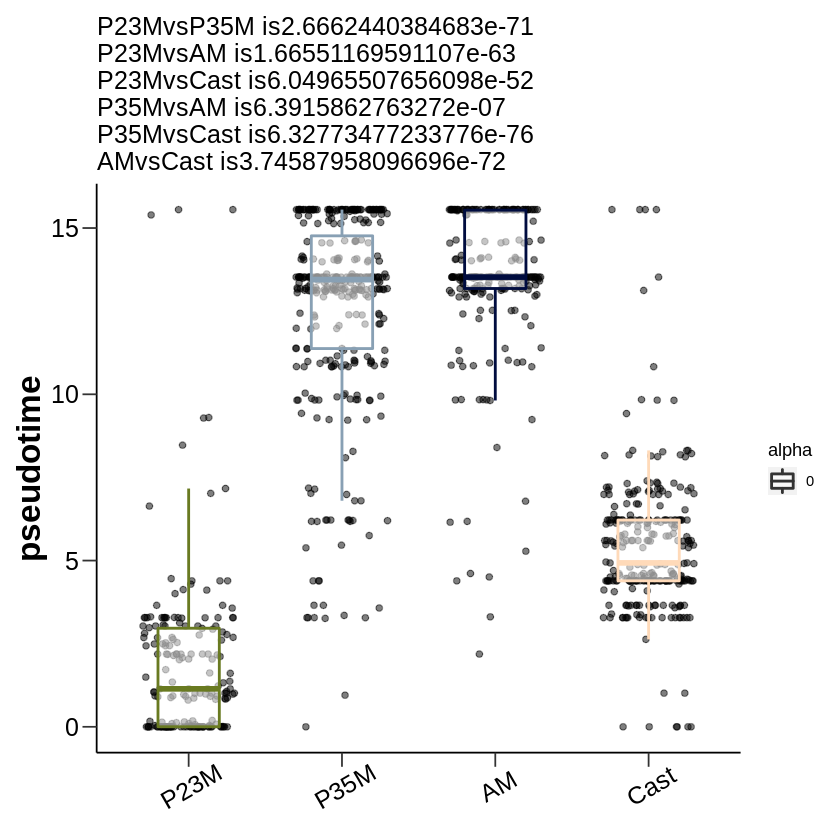

In [32]:
P<-ggplot(merge_all@meta.data,aes(x=stim,y=pseudotime))
P + geom_jitter(width = 0.3, alpha = 0.5,size=1.5,color="black")+geom_boxplot(color=cell_type_color,width=0.4,aes( alpha = 0), size = 0.8,outlier.shape = NA,position = position_dodge(1.5)) +
  theme(axis.text.x=element_text(size=15, angle=30,vjust=0.8,hjust = 0.5,colour = "black"),axis.text.y=element_text(size=15, hjust = 1,colour = "black"),axis.title.y=element_text(size=20,face="bold"),axis.title.x=element_blank(),plot.title = element_text(size=15),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black",size=0.5),axis.ticks.length=unit(.3, "cm"),axis.ticks = element_line(size = 0.5), plot.margin = margin(10, 10, 10, 10))+
ggtitle(paste("P23MvsP35M is",P23MP35M,"\n","P23MvsAM is",P23MAM,"\n","P23MvsCast is",P23MCast,"\n","P35MvsAM is",P35MAM,"\n","P35MvsCast is",P35MCast,"\n","AMvsCast is",AMCast,sep=""))
#ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/male/Esr1_3/pseudotime_Vgat_15_dots.pdf",width=5,height=4)
ggsave(file="/media/garret/New Volume/paper submission/MPOA_Science/Revision_Figures/raw/pseudotime_male_Vgat_dots_rev1_com5.pdf",width=6,height=6)

In [28]:
#statistics

In [29]:
kruskal.test(pseudotime ~ stim, data = merge_all@meta.data)
if(kruskal.test(pseudotime ~ stim, data = merge_all@meta.data)[3]<0.05){
print(pairwise.wilcox.test(merge_all@meta.data[,"pseudotime"], merge_all@meta.data$stim,p.adjust.method = "bonferroni"))
}


	Kruskal-Wallis rank sum test

data:  pseudotime by stim
Kruskal-Wallis chi-squared = 712.23, df = 3, p-value < 2.2e-16



	Pairwise comparisons using Wilcoxon rank sum test 

data:  merge_all@meta.data[, "pseudotime"] and merge_all@meta.data$stim 

     P23M    P35M    AM     
P35M < 2e-16 -       -      
AM   < 2e-16 6.4e-07 -      
Cast < 2e-16 < 2e-16 < 2e-16

P value adjustment method: bonferroni 


# DEG along pseudotime

In [24]:
ciliated_merge_all_m_pr_test_res <- graph_test(merge_all_m, neighbor_graph="principal_graph", cores=9)
pr_deg_ids <- row.names(subset(ciliated_merge_all_m_pr_test_res, q_value < 0.05))

Registered S3 method overwritten by 'spdep':
  method   from
  plot.mst ape 



  |=======================================================| 100%, Elapsed 00:54


In [25]:
saveRDS(ciliated_merge_all_m_pr_test_res ,file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/male/Esr1/12_ciliated_merge_all_m_pr_test_res.rds")

In [27]:
ciliated_merge_all_m_pr_test_res <-readRDS(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/male/Esr1/12_ciliated_merge_all_m_pr_test_res.rds")

In [28]:
test<-subset(ciliated_merge_all_m_pr_test_res,q_value < 0.05/dim(ciliated_merge_all_m_pr_test_res)[1] & p_value < 0.05/dim(ciliated_merge_all_m_pr_test_res))

# visualize genes in UMAP and PT

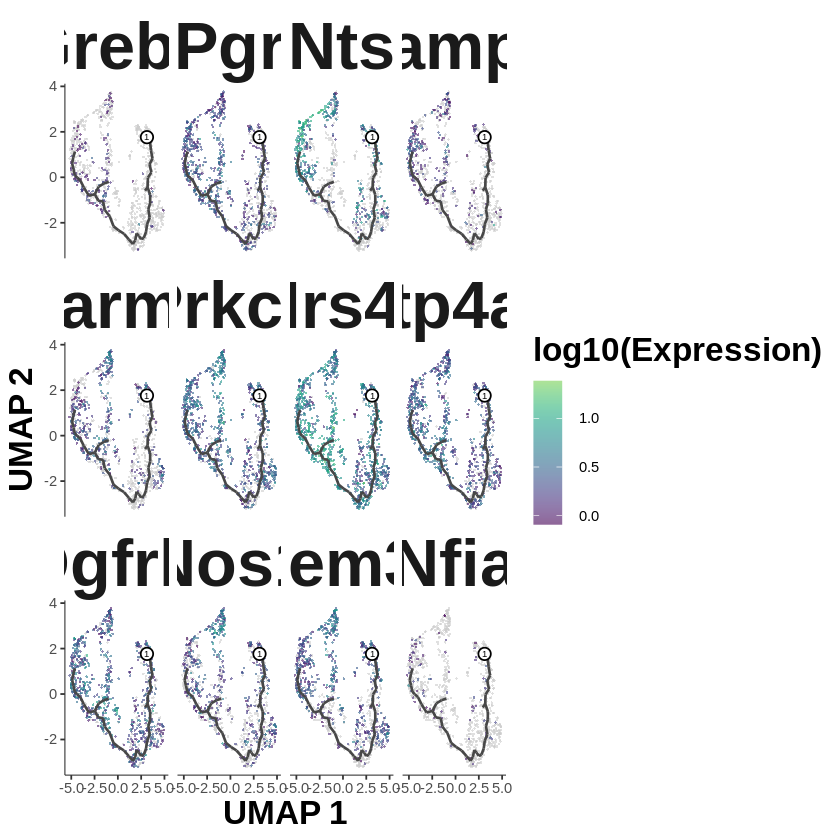

In [25]:
plot_cells(merge_all_m,
           genes=c("Greb1","Pgr","Nts","Lamp5","Parm1","Prkce","Irs4","Ptp4a1","Ogfrl1","Nos1","Tmem35a","Nfia"),cell_size =0.7,alpha = 0.6,label_cell_groups = FALSE,trajectory_graph_segment_size = 0.75,
           label_leaves=FALSE,cell_stroke = I(0/2),
           label_branch_points=FALSE, min_expr = 0.3)+
                    # scale_color_manual(values = celltype_color)+
theme(title=element_text(size=20,angle=0,face="bold"),strip.text = element_text(size = 40,face="bold"))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/male/Esr1_3/trajectory_Esr1_male_Vgat_15_Greb1dim.pdf",width=10,height=10)

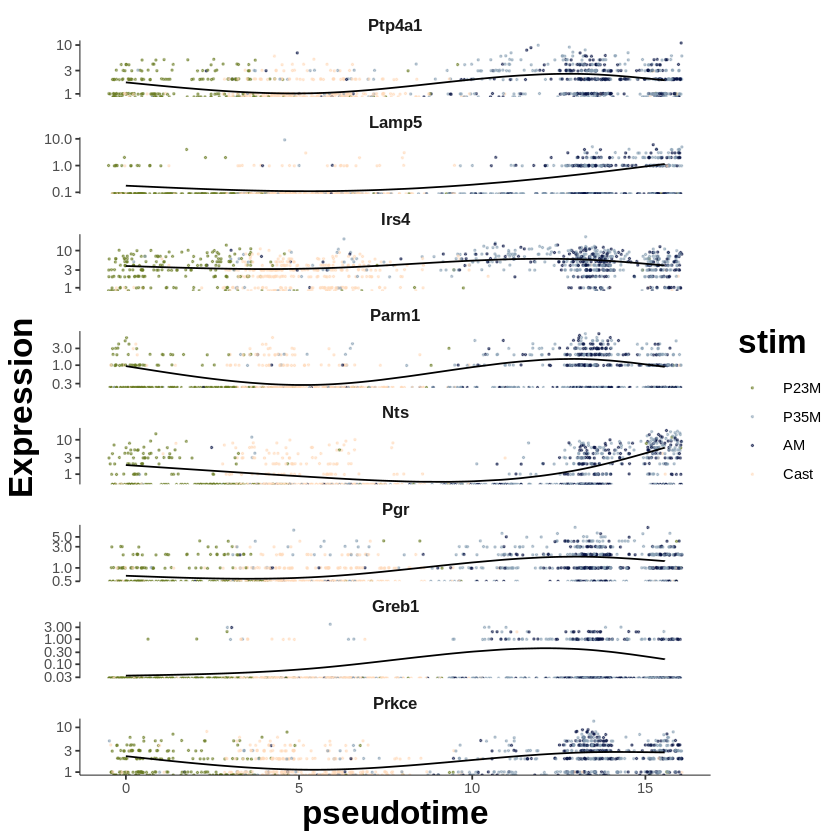

In [28]:
genes <- c("Greb1","Pgr","Nts","Lamp5","Parm1","Prkce","Irs4","Ptp4a1")
mini <- merge_all_m[rowData(merge_all_m)@rownames %in% genes,]
plot_genes_in_pseudotime(mini,label_by_short_name = FALSE,horizontal_jitter=0.5,color_cells_by="stim", cell_size = 0.3)+
scale_color_manual(values =alpha(cell_type_color,0.5))+theme(title=element_text(size=20,angle=0,face="bold"),strip.text = element_text(size = 10,face="bold"))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/male/Esr1_3/trajectory_Greb1_15.pdf",width=4,height=7)

In [39]:
help(plot_genes_in_pseudotime)

In [ ]:
https://github.com/cole-trapnell-lab/monocle-release/issues/406

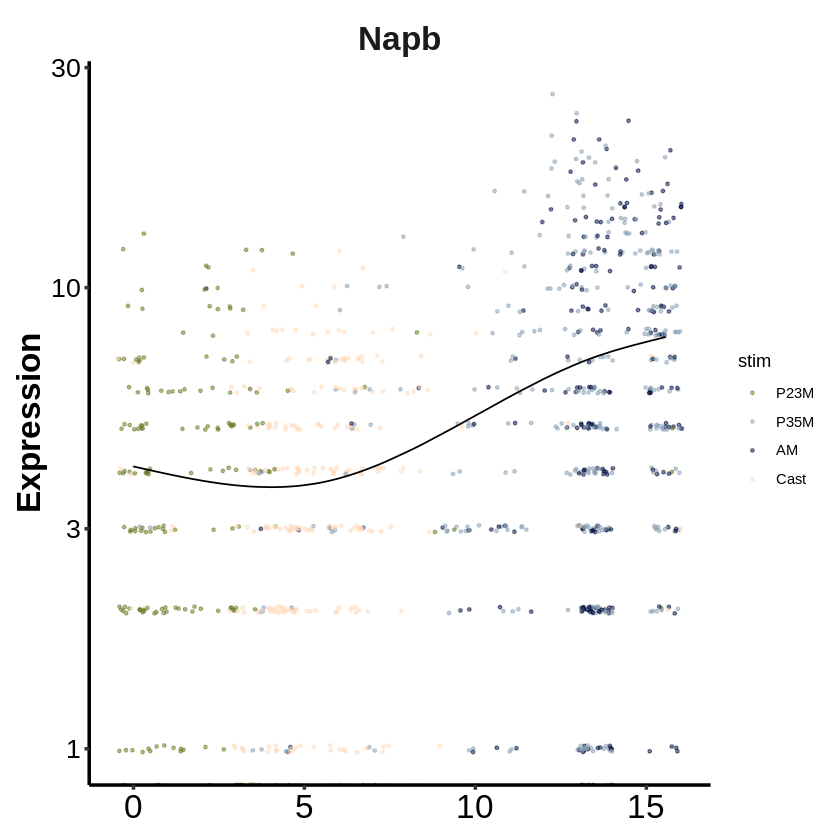

In [111]:
genes <- c("Napb")
mini <- merge_all_m[rowData(merge_all_m)@rownames %in% genes,]
p<-plot_genes_in_pseudotime(mini,label_by_short_name = FALSE,horizontal_jitter=0.5,color_cells_by="stim", cell_size = 0.7)
p+ #scale_y_continuous(breaks=c(0.5,5))+
theme(strip.text = element_text(size=20, face="bold")) +
scale_color_manual(values =alpha(cell_type_color,0.5))+theme(axis.text.x=element_text(size=20, angle=0,vjust=0.8,hjust = 0.5,colour = "black"),axis.text.y=element_text(size=16, hjust = 1,colour = "black"),axis.title.y=element_text(size=20,face="bold"),axis.title.x=element_blank(),plot.title = element_text(size=50,face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = 'black', size = 5),axis.ticks.length=unit(.1, "cm"),axis.ticks = element_line(size = 1), plot.margin = margin(10, 10, 10, 10))+
theme(axis.line.x = element_line(size=1, color="black"),axis.line.y = element_line(size=1, color="black")) 
ggsave(file=paste("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/male/Esr1_3/trajectory_",genes,"_femalegene_15.pdf",sep=""),width=4,height=2)

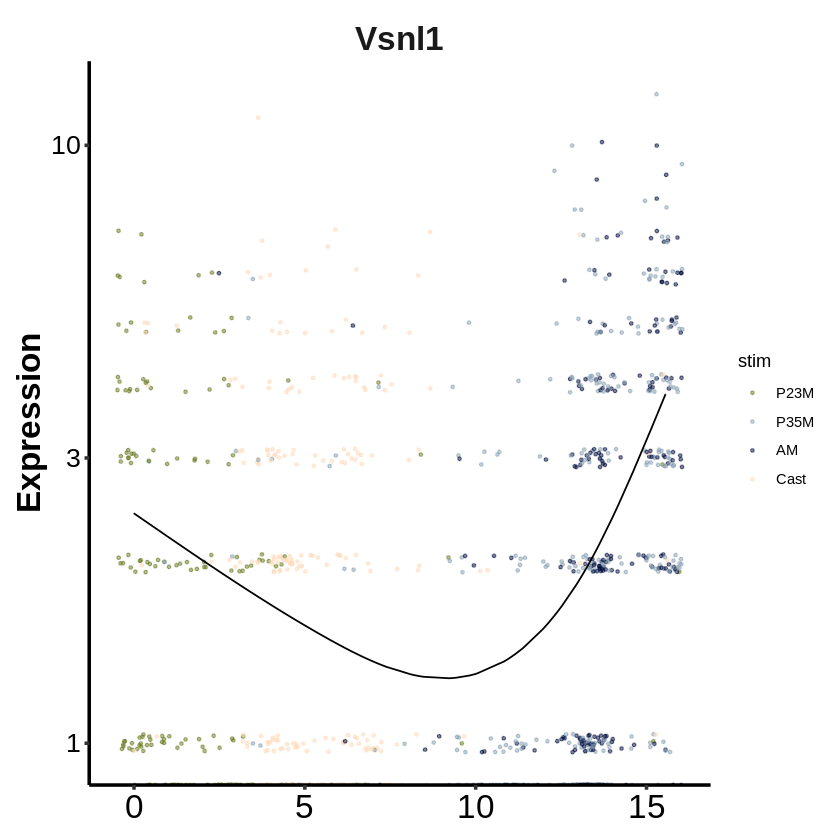

In [77]:
genes <- c("Vsnl1")
mini <- merge_all_m[rowData(merge_all_m)@rownames %in% genes,]
p<-plot_genes_in_pseudotime(mini,label_by_short_name = FALSE,horizontal_jitter=0.5,color_cells_by="stim", cell_size = 0.7)
p+ #scale_y_continuous(breaks=c(0.5,5))+
theme(strip.text = element_text(size=20, face="bold")) +
scale_color_manual(values =alpha(cell_type_color,0.5))+theme(axis.text.x=element_text(size=20, angle=0,vjust=0.8,hjust = 0.5,colour = "black"),axis.text.y=element_text(size=16, hjust = 1,colour = "black"),axis.title.y=element_text(size=20,face="bold"),axis.title.x=element_blank(),plot.title = element_text(size=50,face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = 'black', size = 5),axis.ticks.length=unit(.1, "cm"),axis.ticks = element_line(size = 1), plot.margin = margin(10, 10, 10, 10))+
theme(axis.line.x = element_line(size=1, color="black"),axis.line.y = element_line(size=1, color="black")) 
ggsave(file=paste("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/male/Esr1_3/trajectory_",genes,"_femalegene_15.pdf",sep=""),width=4,height=2)

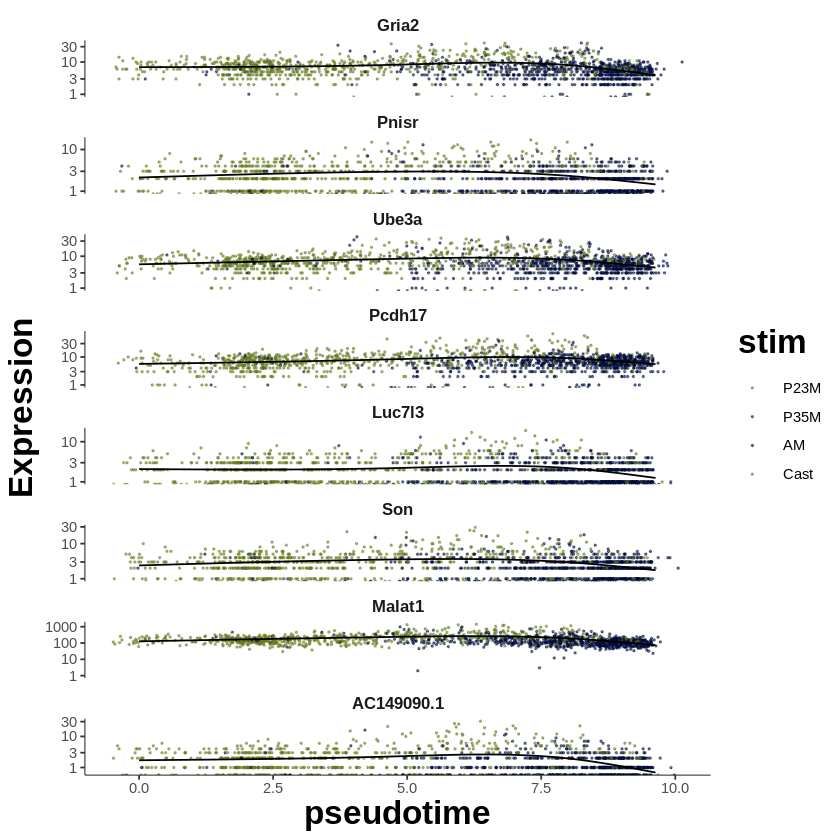

In [37]:
#genes <- tail(subset(max_number_sort,cluster==0),10)$gene
genes <- intersect(P23M,Cast)[8:15]
mini <- merge_all_m[rowData(merge_all_m)@rownames %in% genes,]
plot_genes_in_pseudotime(mini,label_by_short_name = FALSE,horizontal_jitter=0.5,color_cells_by="stim", cell_size = 0.3)+
scale_color_manual(values =alpha(cell_type_color,0.5))+theme(title=element_text(size=20,angle=0,face="bold"),strip.text = element_text(size = 10,face="bold"))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/male/Esr1_3/trajectory_Greb1_12_P23rich2.pdf",width=4,height=7)

In [32]:
P23M<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1/P23M_over_AM/gene_adjust_Vgat_0.1.xlsx",sheetIndex=1)[,1]
Cast<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1/Cast_over_AM/gene_adjust_Vgat_0.1.xlsx",sheetIndex=1)[,1]

# Heatmap DEGs along trajectory

In [13]:
merge_all_m<-readRDS(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/male/Esr1_3/Vgat_Esr1_150_15_merge_all_m.rds")

In [14]:
#210222
AM_Cast_gene<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/AM_over_Cast/gene_adjust_Vgat_0.1.xlsx",sheetIndex=1)[,1]
AM_P23M_gene<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/AM_over_P23M/gene_adjust_Vgat_0.1.xlsx",sheetIndex=1)[,1]
Cast_AM_gene<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/Cast_over_AM/gene_adjust_Vgat_0.1.xlsx",sheetIndex=1)[,1]
P23M_AM_gene<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/P23M_over_AM/gene_adjust_Vgat_0.1.xlsx",sheetIndex=1)[,1]
P35M_Cast_gene<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/P35M_over_Cast/gene_adjust_Vgat_0.1.xlsx",sheetIndex=1)[,1]
P35M_P23M_gene<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/P35M_over_P23M/gene_adjust_Vgat_0.1.xlsx",sheetIndex=1)[,1]
Cast_P35M_gene<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/Cast_over_P35M/gene_adjust_Vgat_0.1.xlsx",sheetIndex=1)[,1]
P23M_P35M_gene<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/P23M_over_P35M/gene_adjust_Vgat_0.1.xlsx",sheetIndex=1)[,1]
hormone_50gene<-AM_Cast_gene
hormone_35gene<-P35M_Cast_gene
Cast_50gene<-Cast_AM_gene
Cast_35gene<-Cast_P35M_gene
P50_gene<-as.character(AM_P23M_gene)[!(AM_P23M_gene %in% c(hormone_50gene,hormone_35gene))]
P35_gene<-as.character(P35M_P23M_gene)[!(P35M_P23M_gene %in% c(hormone_50gene,hormone_35gene))]

P23_50_gene<-as.character(P23M_AM_gene)[!(P23M_AM_gene %in% Cast_50gene)]
P23_35_gene<-as.character(P23M_P35M_gene)[!(P23M_P35M_gene %in% Cast_35gene)]
age_gene<-unique(intersect(rev(P35_gene),rev(P50_gene))) # this is the list of genes that are high in mice >P35
#hormone_gene<-unique(intersect(hormone_50gene,hormone_35gene)) # this is the list of genes that are high in intact mice >P35
hormone_gene<-unique(c(as.character(hormone_50gene),as.character(hormone_35gene)))
young_gene<-P23_50_gene # this is the list of genes that are only high in P23
Cast_gene<-as.character(Cast_50gene)

In [14]:
sum(grepl("Napb",P35M_P23M_gene))

[1] 1

In [15]:
gene_list<-rev(unique(rev(c(young_gene,Cast_gene,age_gene,hormone_gene))))

In [16]:
max(merge_all_m@principal_graph_aux@listData$UMAP$pseudotime)

[1] 15.55503

In [17]:
max(merge_all_m@principal_graph_aux@listData$UMAP$pseudotime)

[1] 15.55503

In [18]:
spacing<-20
Pseudotime<-seq(0, ceiling(max(merge_all_m@principal_graph_aux@listData$UMAP$pseudotime)), by=ceiling(max(merge_all_m@principal_graph_aux@listData$UMAP$pseudotime))/spacing)
Pseudotime<-Pseudotime[1:spacing]

In [19]:
length(Pseudotime)

[1] 20

In [20]:
int<-Pseudotime[2]-Pseudotime[1]

In [21]:
#201113
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)
max_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)

for (i in 1:length(gene_list)){
L<-length(Pseudotime)

Cell_number_t<- data.frame("cluster" =Pseudotime, "gene"=(rep(gene_list[i],L))) # do not use c if the gene is factorizsed
#used normalized uncorrected data
for (p in 1:length(Pseudotime)){
barcode<-names(merge_all_m@principal_graph_aux@listData$UMAP$pseudotime)[Pseudotime[p]< merge_all_m@principal_graph_aux@listData$UMAP$pseudotime &  merge_all_m@principal_graph_aux@listData$UMAP$pseudotime<Pseudotime[p]+int]
Cell_number_t$avg[p]<-(mean(merge_all@assays$RNA@data[gene_list[i],barcode])-mean(merge_all@assays$RNA@data[gene_list[i],]))/sd(merge_all@assays$RNA@data[gene_list[i],])
}
Cell_number<-rbind(Cell_number_t,Cell_number)
max_number_t<-subset(Cell_number_t,Cell_number_t$avg==max(Cell_number_t$avg))
max_number<-rbind(max_number_t,max_number)    
}
#Cell_number$Pseudotime<-factor(Cell_number$Pseudotime,levels=Pseudotime)

In [22]:
max_number_sort<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)
for (i in 1:length(Pseudotime)){
    temp<-subset(max_number,cluster==Pseudotime[i])
    temp<-temp[order(temp$avg),]
    max_number_sort<-rbind(max_number_sort,temp)}

In [23]:
length(unique(max_number_sort$gene))

[1] 378

In [25]:
Cell_number$cluster<-factor(Cell_number$cluster,levels=Pseudotime)
#Cell_number$gene<-factor(Cell_number$gene,levels=gene_list)
Cell_number$gene<-factor(Cell_number$gene,levels=rev(unique(max_number_sort$gene)))

In [26]:
library("scales")

In [27]:
temp_gene<-rev(unique(max_number_sort$gene))

In [28]:
color<-numeric()
size<-numeric()
for(i in 1:length(temp_gene)){
    if(temp_gene[i]=="Apoe" | temp_gene[i]=="Npy2r" |  temp_gene[i]=="Npy2r" | temp_gene[i]=="Gal"| temp_gene[i]=="Guk1" | temp_gene[i]=="Pgr"  | temp_gene[i]=="Prkce"  | temp_gene[i]=="Greb1" | temp_gene[i]=="Sytl4"| temp_gene[i]=="Cntnap2" |temp_gene[i]=="Sv2c" ){
        color[i]<-"black"
        size[i]<-20
    }else{
        color[i]<-"white"
        size[i]<-0
    }
}

In [28]:
color_x<-numeric()
size_x<-numeric()
for(i in 1:length(Pseudotime)){
    if(Pseudotime[i]==Pseudotime[1] | Pseudotime[i]==Pseudotime[7] |  Pseudotime[i]==Pseudotime[13] | Pseudotime[i]==Pseudotime[19]){
        color_x[i]<-"black"
        size_x[i]<-25
    }else{
        color_x[i]<-"white"
        size_x[i]<-0
    }
}

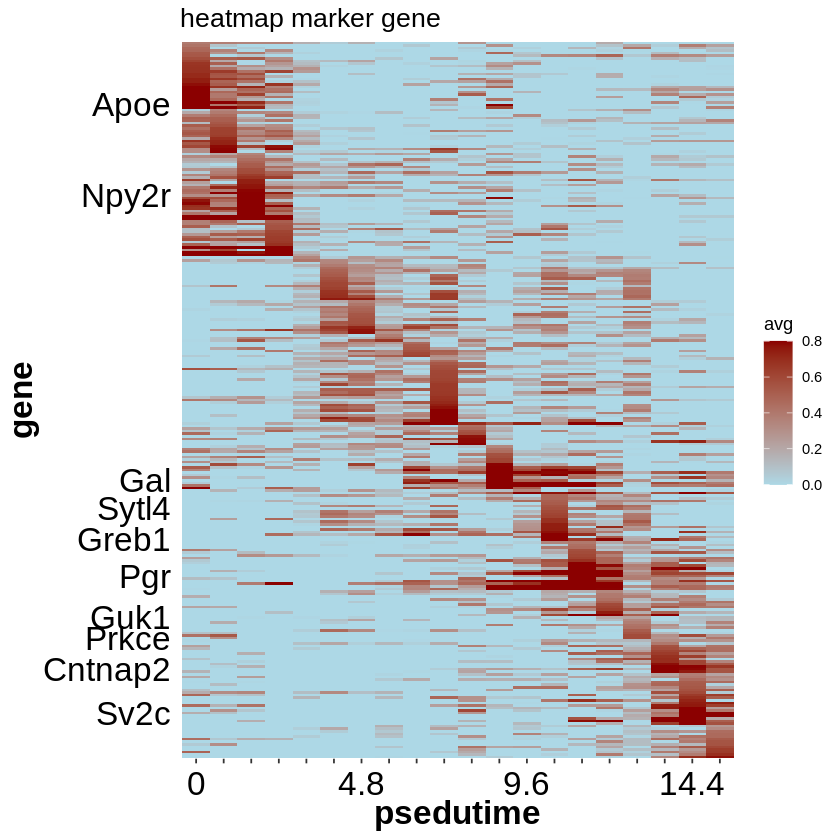

In [64]:
#pdf("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/male/Esr1/DEG_heatmap_light.pdf",width=8,height=10)
low<- 0
high<- 0.8
p<-ggplot(data = Cell_number, mapping = aes(x = cluster, y = gene,fill =avg)) +
  geom_tile() + scale_fill_continuous(limits=c(low, high), breaks=seq(low,high,by=0.2),low = "lightblue",high = "darkred", oob=squish)
pp<-p+ylab("gene")+xlab("psedutime")+theme(axis.text.y=element_text(size=size, colour = color),axis.text.x=element_text(size=size_x,angle = 0, hjust =0.5,vjust=0.3,colour = color_x),axis.title=element_text(size=20,face="bold"),plot.title = element_text(size=16),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "white", size = 0),axis.ticks.y = element_blank())+ggtitle("heatmap marker gene")
print(pp)
ggsave(file=paste(text="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/male/Esr1_3/DEG_heatmap_light_DEGtrajectory_15_",low,"_",high,".pdf"),width=8,height=10)
#dev.off()

In [ ]:
https://stackoverflow.com/questions/47979653/is-it-possible-to-avoid-axis-label-overlapping-by-ggrepel

In [ ]:
#yellow nad black
low<- 0
high<- 1
p<-ggplot(data = Cell_number, mapping = aes(x = cluster, y = gene,fill =avg,label=gene)) +
  geom_tile() + scale_fill_continuous(limits=c(low, high), breaks=seq(low,high,by=0.2),low = "black",high = "yellow", oob=squish)
pp<-p+ylab("gene")+xlab("psedutime")+theme(axis.text.y=element_text(size=size, colour = color,face="bold"),axis.text.x=element_text(size=size_x,angle = 0, hjust =0.5,vjust=0.3,colour = color_x),axis.title=element_blank(),plot.title = element_blank(),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "white", size = 0),axis.ticks.y = element_blank(),axis.ticks.x = element_blank())+ggtitle("heatmap marker gene")
print(pp)
#ggsave(file=paste(text="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/male/Esr1_3/DEG_heatmap_light_DEGtrajectory_15_BL",low,"_",high,".pdf"),width=10,height=8)
#dev.off()

In [55]:
# custom tick version

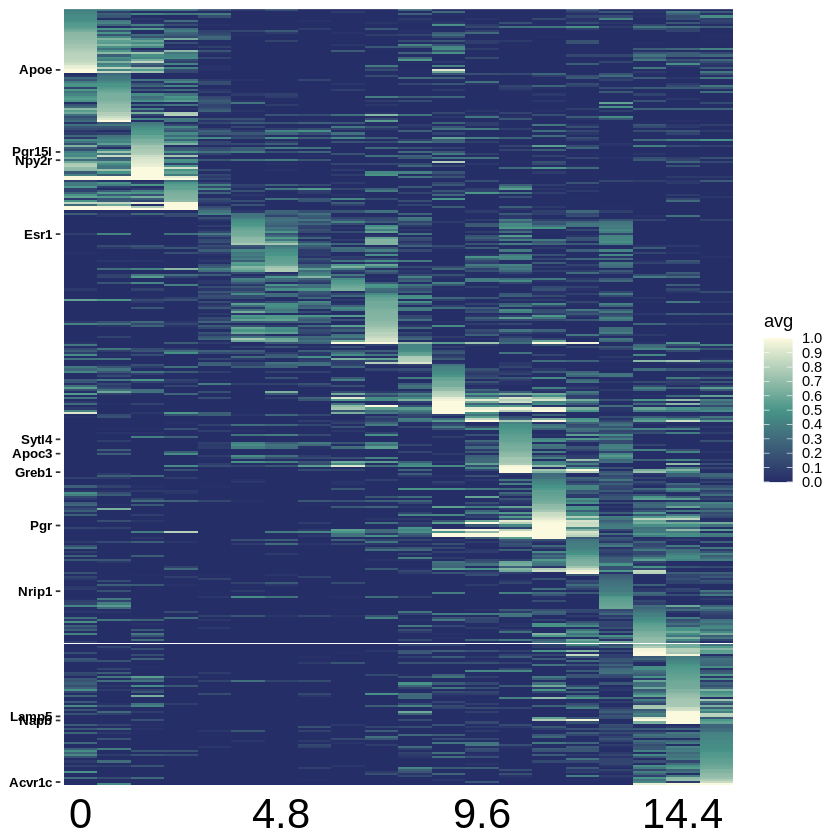

In [31]:
genes<-c("Slc32a1","Esr1","Ar","Npy2r","Pgr15l","Sytl4","Lamp5","Pgr","Nrip1","Acvr1c","Apoc3","Greb1","Tead1","Napb","Apoe")
high_C<-"#FCFADE"
middle_C<-"#489588"
low_C<-"#262E68"
low<- 0
high<- 1
p<-ggplot(data = Cell_number, mapping = aes(x = cluster, y = gene,fill =avg,label=gene)) + scale_y_discrete(breaks=c(genes))+
  geom_tile() + scale_fill_gradient2(limits=c(low, high), breaks=seq(low,high,by=0.1),low = low_C,mid=middle_C,high =high_C,  midpoint = 0.5,oob=squish) # + scale_fill_continuous(limits=c(low, high), breaks=seq(low,high,by=0.2),low = "black",high = "yellow", oob=squish)
pp<-p+ylab("gene")+xlab("psedutime")+theme(axis.text.y=element_text(size=8, colour = "black",face="bold"),axis.text.x=element_text(size=size_x,angle = 0, hjust =0.5,vjust=0.3,colour = color_x),axis.title=element_blank(),plot.title = element_blank(),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line.x = element_line(colour = "white", size = 0),axis.ticks.x = element_blank())+ggtitle("heatmap marker gene")
print(pp)
ggsave(file=paste(text="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/male/Esr1_3/male_DEG_heatmap_light_DEGtrajectory_15_BL_correcty_",low,"_",high,"color_adjusted.pdf"),width=7,height=10)

# proportion of each group along Pseudotime

In [98]:
spacing<-20
Pseudotime<-seq(0, ceiling(max(merge_all_m@principal_graph_aux@listData$UMAP$pseudotime)), by=ceiling(max(merge_all_m@principal_graph_aux@listData$UMAP$pseudotime))/spacing)
Pseudotime<-Pseudotime[1:spacing]

In [99]:
group<-c("P23M","Cast","P35M","AM")

In [100]:
int<-Pseudotime[2]-Pseudotime[1]

In [101]:
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)

for (i in 1:length(group)){
L<-length(Pseudotime)

Cell_number_t<- data.frame("cluster" =Pseudotime, "group"=(rep(group[i],L))) # do not use c if the gene is factorizsed
#used normalized uncorrected data
for (p in 1:length(Pseudotime)){
barcode<-names(merge_all_m@principal_graph_aux@listData$UMAP$pseudotime)[Pseudotime[p]< merge_all_m@principal_graph_aux@listData$UMAP$pseudotime &  merge_all_m@principal_graph_aux@listData$UMAP$pseudotime<Pseudotime[p]+int]
Cell_number_t$proportion[p]<-100*sum(grepl(group[i],barcode))/dim(subset(merge_all@meta.data,stim==group[i]))[1]}
Cell_number<-rbind(Cell_number_t,Cell_number)}

In [102]:
Cell_number$group<-factor(Cell_number$group,levels=rev(group))

In [103]:
Cell_number$cluster<-factor(Cell_number$cluster,levels=Pseudotime)

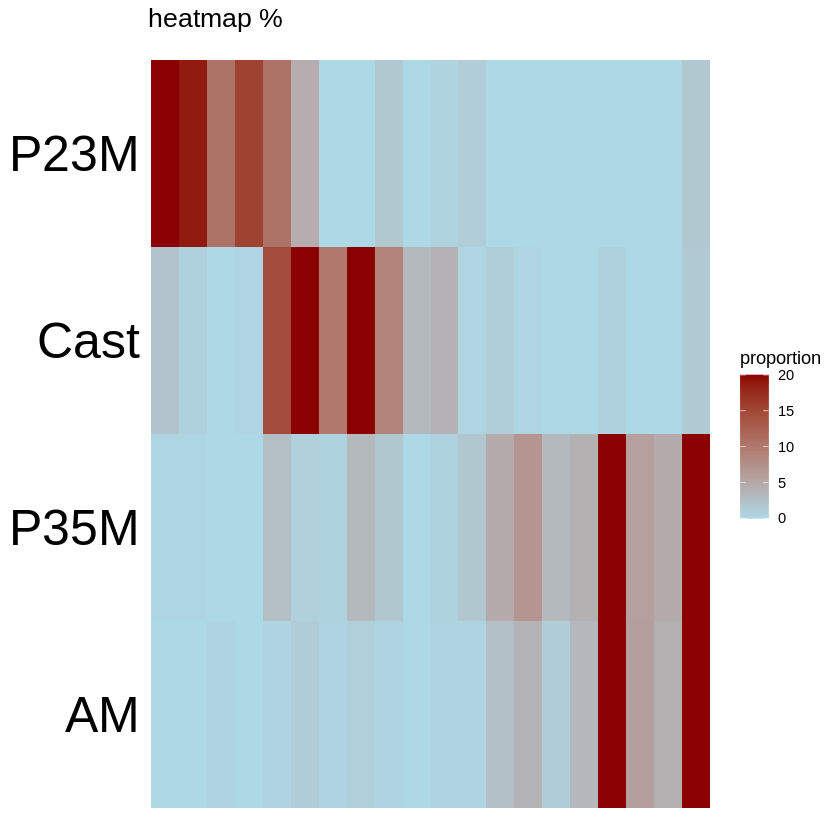

In [107]:
low<-0
high<-20
p<-ggplot(data = Cell_number, mapping = aes(x = cluster, y = group,fill =proportion)) +
  geom_tile() + scale_fill_continuous(limits=c(low, high), breaks=seq(low,high,by=5),low = "lightblue",high = "darkred", oob=squish)
pp<-p+ylab("proportion %")+xlab("psedutime")+theme(axis.text.y=element_text(size=30, colour = "black"),axis.text.x=element_blank(),axis.title=element_blank(),plot.title = element_text(size=16),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "white", size = 0),axis.ticks.y = element_blank(),axis.ticks.x = element_blank())+ggtitle("heatmap %")
print(pp)
ggsave(file=paste(text="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/male/Esr1_3/group_proportion_heatmap_lightint",low,"_",high,".pdf"),width=10,height=2)

In [ ]:
#

In [99]:
write.xlsx(meta,"/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/monocle_velo_male_Esr1Vgat.xlsx")

In [112]:
write.xlsx(unique_gene,"/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/monocle_unique_gene_male_Esr1Vgat.xlsx")

In [110]:
write.xlsx(unique_gene,"/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/monocle_unique_gene_male_Esr1Vgat_all.xlsx")

# comparing sexually dimorphic and monomorphic genes along the trajectory

In [24]:
male_hormone<- read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/AM_over_Cast/All_gene.xlsx",sheetIndex=1)
rownames(male_hormone)<-male_hormone[,1]
female_hormone<- read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/AF_over_OVX/All_gene.xlsx",sheetIndex=1)
rownames(female_hormone)<-female_hormone[,1]
dimorphic<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/dimorphic/dimorphic genes.xlsx",sheetIndex=1)
rownames(dimorphic)<-dimorphic[,2]

In [25]:
rank<-c(1:dim(male_hormone)[1])
#rank<-factor(rank,levels=rank)
male_hormone$rank<-rank

In [26]:
rank<-c(1:dim(female_hormone)[1])
#rank<-factor(rank,levels=rank)
female_hormone$rank<-rank

In [27]:
common<-intersect(rownames(subset(male_hormone,avg_logFC>0 & p_val_adjust<0.05)),rownames(subset(female_hormone,avg_logFC>0 & p_val_adjust<0.05)))

In [28]:
color<-numeric()
for(i in 1:dim(male_hormone)[1]){
    if(male_hormone$avg_logFC[i]>0 & male_hormone$p_val_adjust[i]<0.05 & rownames(male_hormone)[i] %in% common){
        color[i]<-"lightgoldenrod"
    }else if(male_hormone$avg_logFC[i]>0 & male_hormone$p_val_adjust[i]<0.05 & !rownames(male_hormone)[i] %in% common){
        color[i]<-"darkblue"
    }else{
       color[i]<-"black" 
    }
}
male_hormone$color<-color

In [29]:
male<-subset(male_hormone,avg_logFC>0)

In [30]:
male_only<-rownames(subset(male,color=="darkblue"))
common<-rownames(subset(male,color=="lightgoldenrod"))

In [33]:
male_only
length(male_only)

[1] "Eef1a2"        "1500009L16Rik" "Napb"          "Cntnap2"      
 [5] "Lamp5"         "Gm10076"       "Gal"           "Thy1"         
 [9] "Ube2m"         "Mt3"           "Pcsk1n"        "Actg1"        
[13] "Ankrd46"       "Hras"          "Calm3"         "Nell2"        
[17] "Pgam1"         "Greb1"         "Chst2"         "Syt6"         
[21] "Aes"           "Pdcd7"         "Aatk"          "Gpr83"        
[25] "Syndig1l"      "Ubl3"          "Tiparp"        "mt-Nd4l"      
[29] "Kif5a"         "Camk2n2"       "Map1a"         "Ctnnb1"       
[33] "Abat"          "Hs2st1"        "Dynll2"        "mt-Atp6"      
[37] "Tubb3"         "Sult4a1"       "Rnd2"          "Mblac2"       
[41] "mt-Nd1"        "Arf3"          "Scn1b"         "Adgrl1"       
[45] "Atp5k"         "Sipa1l1"       "Ipo5"          "Camk2b"       
[49] "Syp"           "Hspa8"         "Lrrc4b"        "Map1lc3a"     
[53] "Cdh4"          "Scrn1"         "Pnma3"         "Tnrc6c"       
[57] "Tmsb10"        "Csnk1g2"       "Tmem215"       "Nudt4"        
[61] "Cltc"          "Hapln4"        "Tspyl4"        "Tubb4a"       
[65] "Cdk8"          "Prkacb"        "Ret"           "Minos1"       
[69] "Eef2"          "Hk1"           "Dhcr24"        "mt-Nd2"       
[73] "Pcp4l1"        "Hcrtr1"        "Acvr1c"        "mt-Cytb"      
[77] "Pdxp"          "Ppia"          "Trp53inp2"     "mt-Nd4"       
[81] "Fkbp5"         "Rpl35"         "Syndig1"       "Kcnab2"       
[85] "Prkag2"        "Slc35e3"       "Impact"        "AF529169"     
[89] "mt-Co1"        "Hs3st2"        "mt-Co3"

[1] 91

In [34]:
common
length(common)

[1] "Pgr"     "Ptp4a1"  "Nts"     "Parm1"   "Prkce"   "Ogfrl1"  "Irs4"   
 [8] "Nos1"    "Maged1"  "Grik1"   "Tmem35a" "Id4"     "Hpcal1"  "Gfra1"  
[15] "Sez6l"   "Itm2c"   "Irs2"    "Ctnna2"  "Pdzrn4"  "Apoc3"   "Pak3"   
[22] "Sv2c"    "Nexmif"  "Nrip1"   "mt-Co2"  "Ets2"    "Fstl5"   "Drp2"   
[29] "Sytl4"   "Socs2"   "Kcnk2"   "Brinp2"  "Hs3st5"  "Scd2"    "Stk19"  
[36] "Eif1b"   "Col25a1" "Chst11"  "mt-Nd3"  "Gm16485" "Pdcd4"   "Ywhah"  
[43] "Nrp1"    "Scml4"   "Nxn"     "Unc5b"   "Slitrk6"

[1] 47

In [80]:
merge_all_m<-readRDS(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/male/Esr1_3/Vgat_Esr1_150_15_merge_all_m.rds")

In [81]:
spacing<-20
Pseudotime<-seq(0, ceiling(max(merge_all_m@principal_graph_aux@listData$UMAP$pseudotime)), by=ceiling(max(merge_all_m@principal_graph_aux@listData$UMAP$pseudotime))/spacing)
Pseudotime<-Pseudotime[1:spacing]
int<-Pseudotime[2]-Pseudotime[1]

In [82]:
max(merge_all_m@principal_graph_aux@listData$UMAP$pseudotime)

[1] 15.55503

In [97]:
gene_list<-male_only

In [98]:
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)


for (i in 1:length(gene_list)){
L<-length(Pseudotime)

Cell_number_t<- data.frame("cluster" =Pseudotime, "gene"=(rep(gene_list[i],L))) # do not use c if the gene is factorizsed
#used normalized uncorrected data
for (p in 1:length(Pseudotime)){
barcode<-names(merge_all_m@principal_graph_aux@listData$UMAP$pseudotime)[Pseudotime[p]< merge_all_m@principal_graph_aux@listData$UMAP$pseudotime &  merge_all_m@principal_graph_aux@listData$UMAP$pseudotime<Pseudotime[p]+int]
Cell_number_t$avg[p]<-(mean(merge_all@assays$RNA@data[gene_list[i],barcode])-mean(merge_all@assays$RNA@data[gene_list[i],]))/sd(merge_all@assays$RNA@data[gene_list[i],])
}
Cell_number<-rbind(Cell_number_t,Cell_number)
 
}

In [100]:
Cell_number$type<-rep("male_only",dim(Cell_number)[1])
Cell_number1<-Cell_number

In [101]:
gene_list<-common

In [102]:
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)


for (i in 1:length(gene_list)){
L<-length(Pseudotime)

Cell_number_t<- data.frame("cluster" =Pseudotime, "gene"=(rep(gene_list[i],L))) # do not use c if the gene is factorizsed
#used normalized uncorrected data
for (p in 1:length(Pseudotime)){
barcode<-names(merge_all_m@principal_graph_aux@listData$UMAP$pseudotime)[Pseudotime[p]< merge_all_m@principal_graph_aux@listData$UMAP$pseudotime &  merge_all_m@principal_graph_aux@listData$UMAP$pseudotime<Pseudotime[p]+int]
Cell_number_t$avg[p]<-(mean(merge_all@assays$RNA@data[gene_list[i],barcode])-mean(merge_all@assays$RNA@data[gene_list[i],]))/sd(merge_all@assays$RNA@data[gene_list[i],])
}
Cell_number<-rbind(Cell_number_t,Cell_number)
 
}

In [103]:
Cell_number$type<-rep("shared",dim(Cell_number)[1])
Cell_number2<-Cell_number
Cell_number<-rbind(Cell_number1,Cell_number2)

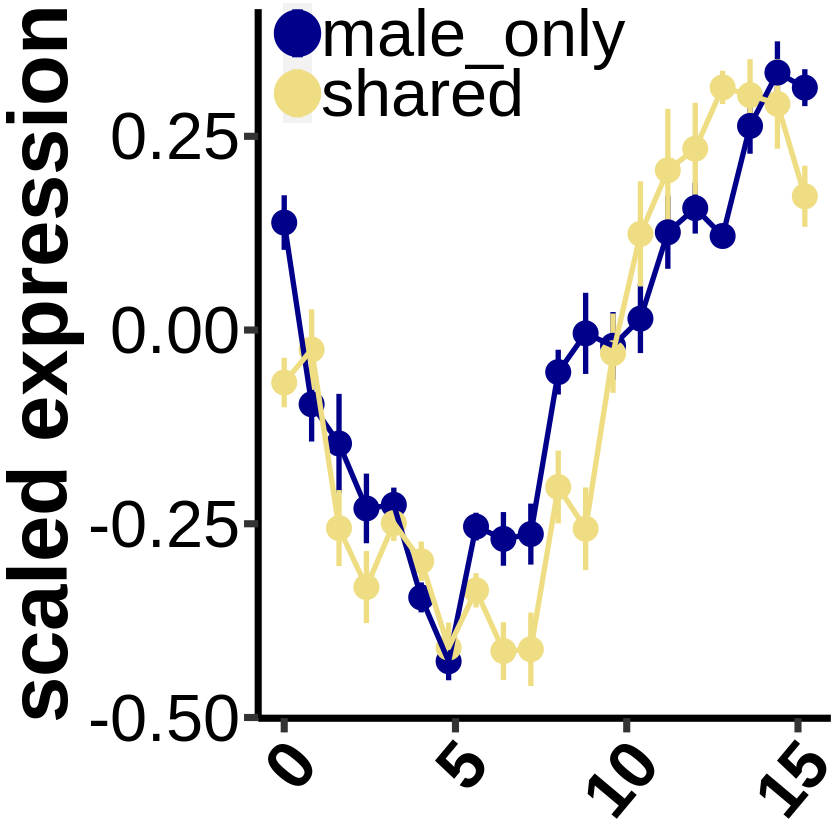

In [110]:
ggplot(Cell_number,aes(x=cluster,y=avg,color=type,group=type))+
stat_summary(fun.y = mean,
               fun.ymin = function(x) mean(x) - sd(x)/(length(x))^0.5, 
               fun.ymax = function(x) mean(x) + sd(x)/(length(x))^0.5, 
               geom = "pointrange",size=1.5) +
  stat_summary(fun.y = mean,
               geom = "line",  size=1.5) +
scale_color_manual(labels=c("male_only","shared"),values=c("darkblue","lightgoldenrod"))+
ylab("scaled expression")+ guides(colour = guide_legend(override.aes = list(size=3)))+
theme(axis.text.x=element_text(size=40,angle =50,hjust = 1, color="black",face="bold"),axis.text.y=element_text(size=40,hjust = 1, color="black"),axis.title.y=element_text(size=50,face="bold"),axis.title.x=element_blank(),plot.title = element_text(size=24),,panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(),axis.line = element_line(colour = "black",size=2),legend.title=element_blank(),legend.text=element_text(size=40),legend.position=c(0.34,0.93),axis.ticks.length=unit(.3, "cm"),axis.ticks = element_line(size = 2))


In [111]:
length(male_only)
length(common)

[1] 91

[1] 47

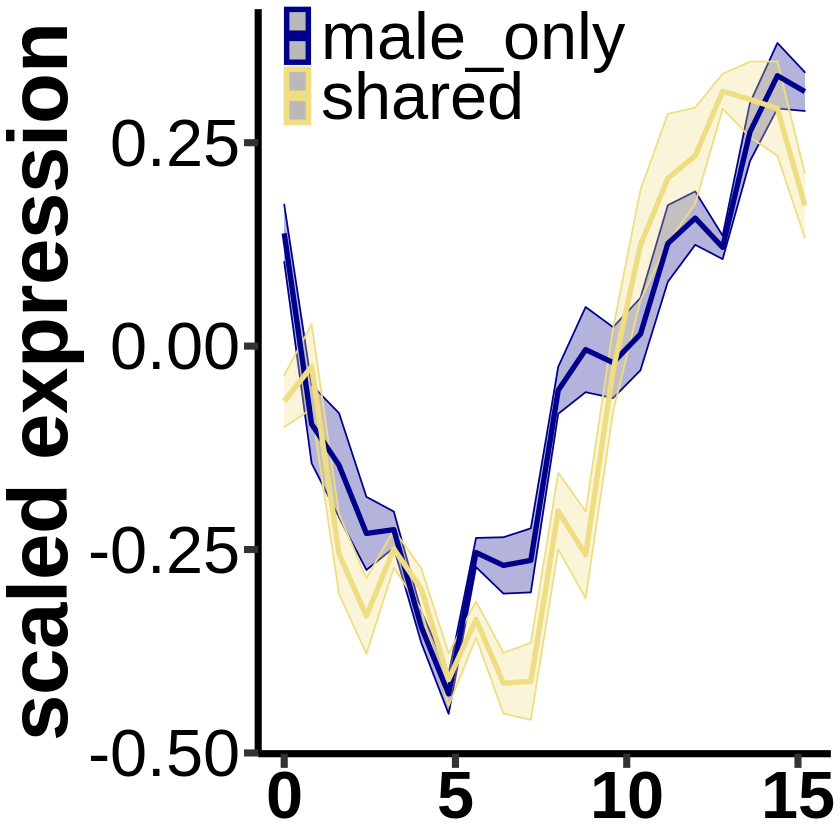

In [129]:
ggplot(Cell_number,aes(x=cluster,y=avg,color=type,group=type,fill=type))+
stat_summary(fun.y = mean,
               fun.ymin = function(x) mean(x) - sd(x)/(length(x))^0.5, 
               fun.ymax = function(x) mean(x) + sd(x)/(length(x))^0.5, 
               geom = "ribbon",fill=c(rep("darkblue",20),rep("lightgoldenrod",20)),alpha=0.3) +
  stat_summary(fun.y = mean,
               geom = "line",  size=1.5) +
scale_color_manual(labels=c("male_only","shared"),values=c("darkblue","lightgoldenrod"))+
ylab("scaled expression")+ guides(colour = guide_legend(override.aes = list(size=3)))+
theme(axis.text.x=element_text(size=40,angle =0,hjust = 0.5, color="black",face="bold"),axis.text.y=element_text(size=40,hjust = 1, color="black"),axis.title.y=element_text(size=50,face="bold"),axis.title.x=element_blank(),plot.title = element_text(size=24),,panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(),axis.line = element_line(colour = "black",size=2),legend.title=element_blank(),legend.text=element_text(size=40),legend.position=c(0.34,0.93),axis.ticks.length=unit(.3, "cm"),axis.ticks = element_line(size = 2))
ggsave(file=paste(text="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/male/Esr1_3/dimorphic_genes",".pdf"),width=10,height=8)